# <center><u> P9 - Produisez une étude de marché 🐓 </u></center>
## Deuxième partie: Clustering_Visualisations
### Sommaire

[1.	Importation des bibliothèques et du data frame](#1.-Importation-des-bibliothèques-et-du-data-frame)

[2.	Mise en place de l'ACP](#2.-Mise-en-place-de-l'ACP)


[3. Cercle de Corrélation](#3.-Cercle-de-Corrélation)

[4. Projection des données sur les axes](#4.-Projection-des-données-sur-les-axes)

[5. Classification hiérarchique](#5.-Classification-hiérarchique)

[6. Identification du nombre de cluster par Kmeans](#6.-Identification-du-nombre-de-cluster-par-Kmeans)

[7. Comparaison des clusters obtenus par dendrogramme et par Kmeans et sélection des pays](#7.-Comparaison-des-clusters-obtenus-par-dendrogramme-et-par-Kmeans-et-sélection-des-pays)

[8. Conclusion](#8.-Conclusion)

### 1.	Importation des bibliothèques et du data frame

In [244]:
# Importation des librairies nécessaires

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn import decomposition, preprocessing
from sklearn.metrics import davies_bouldin_score
from sklearn import cluster
from sklearn import metrics

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import seaborn as sns
sns.set()

In [245]:
# Importation du data frame

data_lapoule = pd.read_csv('lapoule.csv', index_col=0)

### 2. Mise en place de l'ACP

<b> L'ACP nous permettra de se faire une idée sur les liens de nos différentes données. <b/>

In [246]:
# Copie du data frame initial dans la variable "analyse"

analyse = data_lapoule.copy()

# Sélection des colonnes nécessaires à notre analayse

analyse = analyse[['Proportion volaille dispo', 'Proportion Kcal volaille',
                   'Proportion proteine volaille', 'Proportion import volaille',
                  'Proportion production volaille', 'Evolution Pop 2012-2017', 'PIB/Habitant $', 'Indice stabilité politique', 'Montant importation poulet 1000$',
                   'Taxe commerce inter', 'Taux utilisation internet', 'Distance', 'Evolution PIB 2012-2017']]

La variable population a été écartée car elle allait trop tirer les autres données à causes des outliers qui sont assez important.

In [247]:
# Enregistrement des noms des pays dans la variable "names"

names = analyse.index

In [248]:
# Enregistrement des noms des colonnes dans la variable "features"

features = analyse.columns

In [249]:
# Transformation de notre dataframe en array à travers la variable "X"

X = analyse.values

In [250]:
# Standardisation de nos données

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [251]:
# Aperçu de la moyenne et de l'écart type de nos données transformées

idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8,9,10,11,12
mean,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Données attendues: Moyenne à 0 et écart type à 1

<b> Détermination des axes </b>

In [252]:
# Initialisation du nombre de composantes principales à calculer

n_comp = len(analyse.columns)

Par défaut, on prend le nombre de colonnes de notre data frame (13 dans ce cas)

In [253]:
# Calcul du nombre de composantes principales

pca = PCA(n_components=n_comp)

In [254]:
# Entraînement sur les données transformées

pca.fit_transform(X_scaled)

array([[-3.52924893,  0.80668599,  0.85852621, ...,  0.58920608,
        -0.08482822,  0.02098181],
       [ 1.31060343,  1.06515101, -0.74971004, ..., -0.18626571,
         0.06935978, -0.29546562],
       [ 0.51356752, -0.81121687,  0.40088498, ..., -0.35089982,
        -0.48874811, -0.01886123],
       ...,
       [ 6.38349124, 10.11021942, -0.17486448, ...,  0.40108873,
         0.17210678, -0.0140248 ],
       [-3.34580049,  0.59741596,  0.02869746, ...,  0.49211831,
        -0.15635117,  0.06280006],
       [-2.79777973,  0.43516146, -1.95105291, ...,  0.14535856,
         0.1908272 ,  0.016372  ]])

In [255]:
# Variances obtenues pour chacune de nos composantes

pca.explained_variance_ratio_

array([0.29902384, 0.15307434, 0.13046121, 0.09546557, 0.07757698,
       0.05740378, 0.05390928, 0.05003346, 0.03930167, 0.02411614,
       0.01523148, 0.00352082, 0.00088142])

In [256]:
# Enregistrement des variances dans la variable "scree"

scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([29.9 , 15.31, 13.05,  9.55,  7.76,  5.74,  5.39,  5.  ,  3.93,
        2.41,  1.52,  0.35,  0.09])

In [257]:
# Somme cumulée des variances

scree_cum = scree.cumsum().round()
scree_cum

array([ 30.,  45.,  58.,  68.,  76.,  81.,  87.,  92.,  96.,  98., 100.,
       100., 100.])

In [258]:
# Enregistrement des composantes dans la variable "x_list"

x_list = range(1, n_comp+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

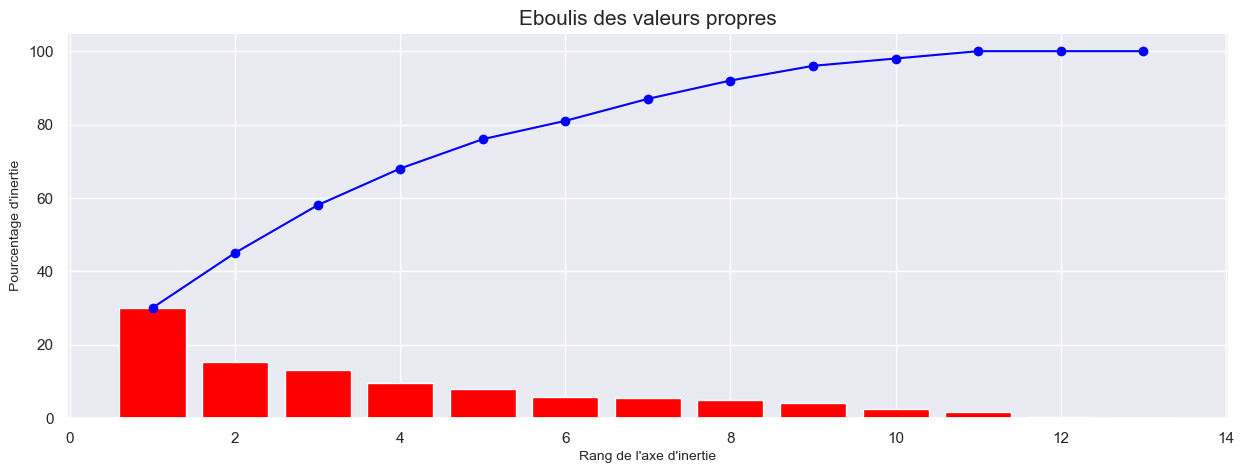

In [259]:
# Éboulis des valeurs propres / Affichage graphique des composantes

plt.figure(figsize=(15, 5))
plt.bar(x_list, scree,color = 'red')
plt.plot(x_list, scree_cum, c="blue", marker='o')
plt.xlabel("Rang de l'axe d'inertie", fontsize=10)
plt.ylabel("Pourcentage d'inertie", fontsize=10)
plt.title("Eboulis des valeurs propres", fontsize=15)

plt.show()

<b>En rouge, nous avons la variance de chaque composante, et en bleu la variance cumulée.
On peut remarquer que 81% de la variance est exprimée par les 6 premières composantes.
    
<b>Nous allons donc considerer les 6 prémières composantes pour notre étude.<b/>

In [260]:
# Composantes réduites

n_comp_reduced = 6

pca_reduced = PCA(n_components=n_comp_reduced)

# Entraînement sur les données nouvelles transformées

pca_reduced.fit_transform(X_scaled)

array([[-3.52924893,  0.80668599,  0.85852621, -1.4029484 , -0.19275419,
        -0.01296667],
       [ 1.31060343,  1.06515101, -0.74971004, -1.49415451,  0.66358656,
        -1.05900686],
       [ 0.51356752, -0.81121687,  0.40088498,  0.98813332, -0.83955123,
        -0.22436716],
       ...,
       [ 6.38349124, 10.11021942, -0.17486448,  0.46724801, -1.71616202,
         2.4063548 ],
       [-3.34580049,  0.59741596,  0.02869746,  1.5314472 ,  1.01229636,
         0.9173709 ],
       [-2.79777973,  0.43516146, -1.95105291, -0.17221668,  1.94134325,
         0.70117262]])

In [261]:
# Variances obtenues pour chaque composante

pca_reduced.explained_variance_ratio_

array([0.29902384, 0.15307434, 0.13046121, 0.09546557, 0.07757698,
       0.05740378])

In [262]:
# Enregistrement des variances dans la variable "scree_reduced"

scree_reduced = (pca_reduced.explained_variance_ratio_*100).round(2)
scree_reduced

array([29.9 , 15.31, 13.05,  9.55,  7.76,  5.74])

In [263]:
# Somme cumulée des variances

scree_cum_reduced = scree_reduced.cumsum().round()
scree_cum_reduced

array([30., 45., 58., 68., 76., 81.])

In [264]:
# Enregistrement des composantes dans la variable "x_list_reduced"

x_list_reduced = range(1, n_comp_reduced+1)
list(x_list_reduced)

[1, 2, 3, 4, 5, 6]

In [265]:
# Calcul des composantes

pcs = pca_reduced.components_
pcs

array([[ 0.17615832,  0.38179175,  0.41147569,  0.21206072,  0.18053679,
        -0.29339053,  0.39539283,  0.32143164,  0.12740643, -0.16501171,
         0.4265325 , -0.07029613, -0.01622352],
       [ 0.64960963, -0.00590945, -0.03407763,  0.15241595,  0.64021452,
         0.08304317, -0.1585645 , -0.2442445 , -0.02971782,  0.01736405,
        -0.14374855,  0.16994636,  0.03579882],
       [ 0.04352433, -0.39731844, -0.32485588,  0.28681963,  0.03683048,
        -0.02394373,  0.15788382, -0.17963225,  0.4057987 , -0.34902053,
         0.12181994, -0.53897013,  0.03879708],
       [ 0.06899145, -0.14505899, -0.14600025, -0.24201669,  0.06858941,
        -0.4480453 , -0.07991079,  0.20835851, -0.07167726,  0.11423796,
         0.02765135, -0.06173082,  0.78504687],
       [-0.06838503, -0.04865463, -0.03216195,  0.44291359, -0.08031019,
         0.07509243, -0.02701464,  0.18099612,  0.60105004,  0.5104414 ,
        -0.06643945,  0.32507702,  0.13516858],
       [ 0.13463353, -0.171942

In [266]:
# Version Pandas des composantes

pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.176158,0.381792,0.411476,0.212061,0.180537,-0.293391,0.395393,0.321432,0.127406,-0.165012,0.426532,-0.070296,-0.016224
1,0.649610,-0.005909,-0.034078,0.152416,0.640215,0.083043,-0.158565,-0.244245,-0.029718,0.017364,-0.143749,0.169946,0.035799
2,0.043524,-0.397318,-0.324856,0.286820,0.036830,-0.023944,0.157884,-0.179632,0.405799,-0.349021,0.121820,-0.538970,0.038797
3,0.068991,-0.145059,-0.146000,-0.242017,0.068589,-0.448045,-0.079911,0.208359,-0.071677,0.114238,0.027651,-0.061731,0.785047
4,-0.068385,-0.048655,-0.032162,0.442914,-0.080310,0.075092,-0.027015,0.180996,0.601050,0.510441,-0.066439,0.325077,0.135169
5,0.134634,-0.171943,-0.103667,-0.236398,0.157856,0.320958,0.354439,0.183179,-0.161230,0.613436,0.224321,-0.362911,-0.119336


In [267]:
# Arrondissement et affectation des noms des colonnes à nos composantes

pcs.columns = features
pcs.index = [f"F{i}" for i in x_list_reduced]
pcs.round(2)

,Proportion volaille dispo,Proportion Kcal volaille,Proportion proteine volaille,Proportion import volaille,Proportion production volaille,Evolution Pop 2012-2017,PIB/Habitant $,Indice stabilité politique,Montant importation poulet 1000$,Taxe commerce inter,Taux utilisation internet,Distance,Evolution PIB 2012-2017
F1,0.18,0.38,0.41,0.21,0.18,-0.29,0.40,0.32,0.13,-0.17,0.43,-0.07,-0.02
F2,0.65,-0.01,-0.03,0.15,0.64,0.08,-0.16,-0.24,-0.03,0.02,-0.14,0.17,0.04
F3,0.04,-0.40,-0.32,0.29,0.04,-0.02,0.16,-0.18,0.41,-0.35,0.12,-0.54,0.04
F4,0.07,-0.15,-0.15,-0.24,0.07,-0.45,-0.08,0.21,-0.07,0.11,0.03,-0.06,0.79
F5,-0.07,-0.05,-0.03,0.44,-0.08,0.08,-0.03,0.18,0.60,0.51,-0.07,0.33,0.14
F6,0.13,-0.17,-0.10,-0.24,0.16,0.32,0.35,0.18,-0.16,0.61,0.22,-0.36,-0.12


In [268]:
# Transposition des données

pcs.T

,F1,F2,F3,F4,F5,F6
Proportion volaille dispo,0.176158,0.649610,0.043524,0.068991,-0.068385,0.134634
Proportion Kcal volaille,0.381792,-0.005909,-0.397318,-0.145059,-0.048655,-0.171943
Proportion proteine volaille,0.411476,-0.034078,-0.324856,-0.146000,-0.032162,-0.103667
Proportion import volaille,0.212061,0.152416,0.286820,-0.242017,0.442914,-0.236398
Proportion production volaille,0.180537,0.640215,0.036830,0.068589,-0.080310,0.157856
Evolution Pop 2012-2017,-0.293391,0.083043,-0.023944,-0.448045,0.075092,0.320958
PIB/Habitant $,0.395393,-0.158565,0.157884,-0.079911,-0.027015,0.354439
Indice stabilité politique,0.321432,-0.244245,-0.179632,0.208359,0.180996,0.183179
Montant importation poulet 1000$,0.127406,-0.029718,0.405799,-0.071677,0.601050,-0.161230
Taxe commerce inter,-0.165012,0.017364,-0.349021,0.114238,0.510441,0.613436


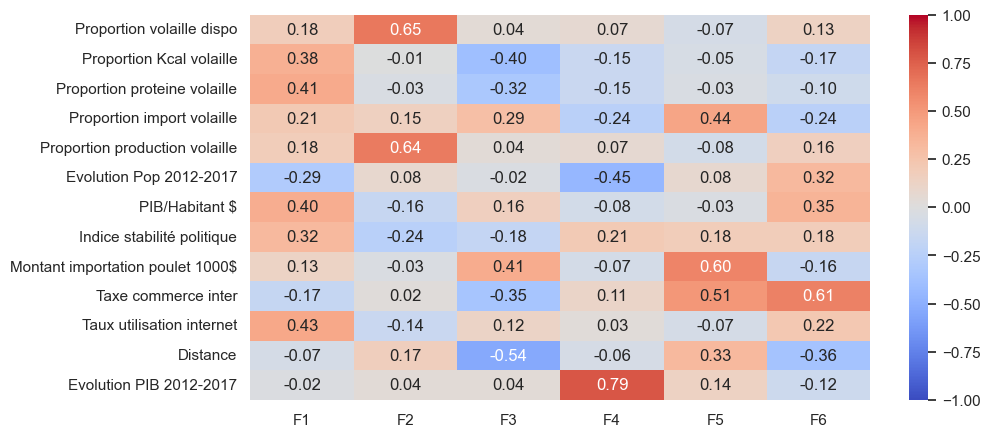

In [269]:
# Heatmap pour visualiser la répresentation de nos composantes

fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f");

Corrélation positive entre l'axe F1 et : La proportion de Kcal de volaille, la proportion de protéine de volaille,PIB/Habitant $, l'indice de stabilité politique et le taux d'utilisation d'internet, une corrélation négative entre l'évolution de la population entre 2012 et 2017, ainsi qu'avec la taxe sur le commerce international.


Corrélation positive entre l'axe F2 et : La proportion de volaille dispo, la proportion de production de volaille. Une corrélation négative avec l'indice de stabilité politique.


Corrélation positive entre l'axe F3 et : La proportion des importations de volaille, le montant des importations de poulet, une corrélation négative avec le proportion Kcal de volaille ainsi que la distance.



Corrélation positive entre l'axe F4 et : L'évolution du PIB entre 2012 et 2017 et une corrélation négative avec l'évolution de la population entre 2012 et 2017.


Nous allons chercher à observer les différentes corrélations à travers le cercle de corrélation.

### 3. Cercle de Corrélation

In [270]:
# Fonction pour tracer le cercle de corrélation

def correlation_graph(pca, x_y, features):

    # Extrait x et y
    x, y = x_y

    # Taille de l'image
    fig, ax = plt.subplots(figsize=(20, 15))

    # Pour chaque composante :
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0, 0,
                 pca.components_[x, i],
                 pca.components_[y, i],
                 head_width=0.02,
                 head_length=0.02,
                 width=0.01,)

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                 pca.components_[y, i] + 0.05,
                 features[i])

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='red', ls='--')
    plt.plot([0, 0], [-1, 1], color='red', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(
        x+1, round(100*pca.explained_variance_ratio_[x], 1)), fontsize=15)
    plt.ylabel('F{} ({}%)'.format(
        y+1, round(100*pca.explained_variance_ratio_[y], 1)), fontsize=15)

    # Titre du cercle
    plt.title("Cercle des corrélations (F{} et F{})".format(
        x+1, y+1), fontsize=15)

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    # Ajoute d'un cercle unitaire pour l'échelle
    plt.plot(np.cos(an), np.sin(an))

    # Axes et affichage
    plt.axis('equal')
    plt.show(block=False)

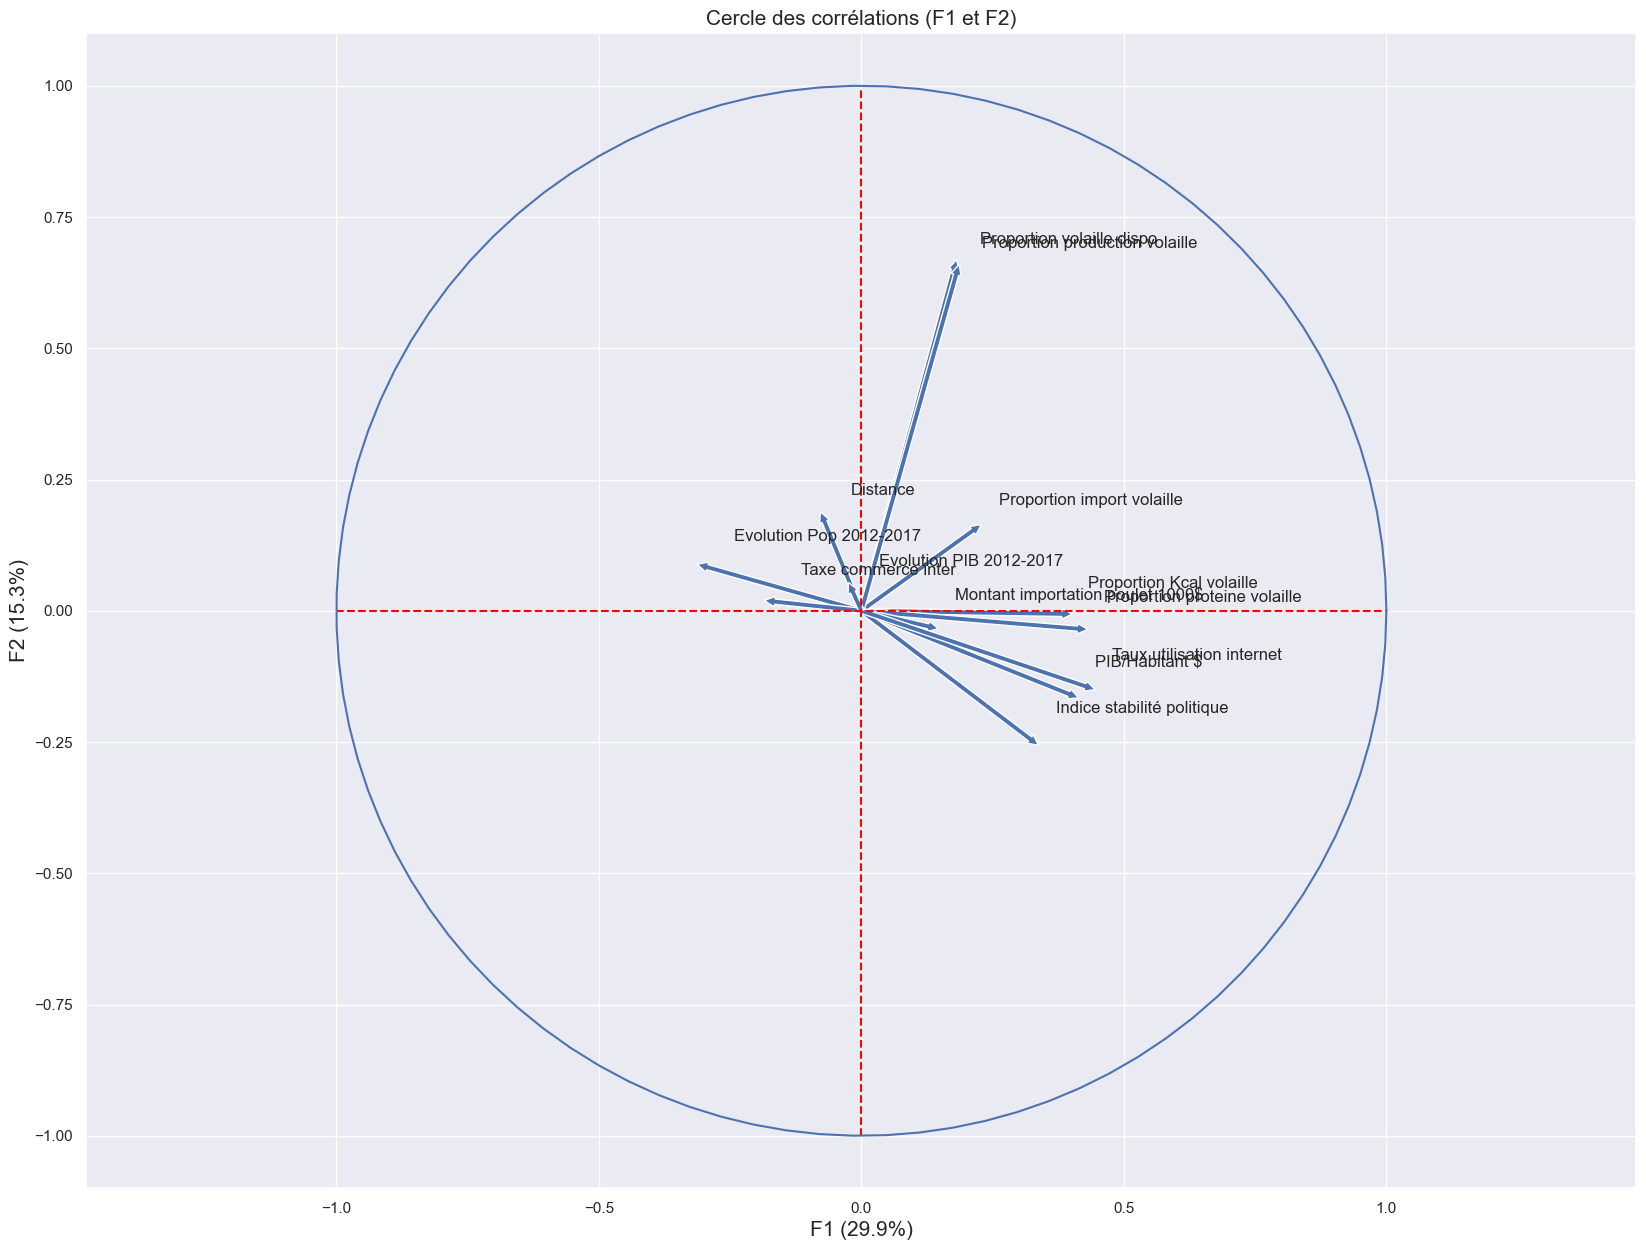

In [271]:
# Cercle de corrélation pour F1 et F2
figsize=(50, 30)
correlation_graph(pca_reduced, (0,1), features)

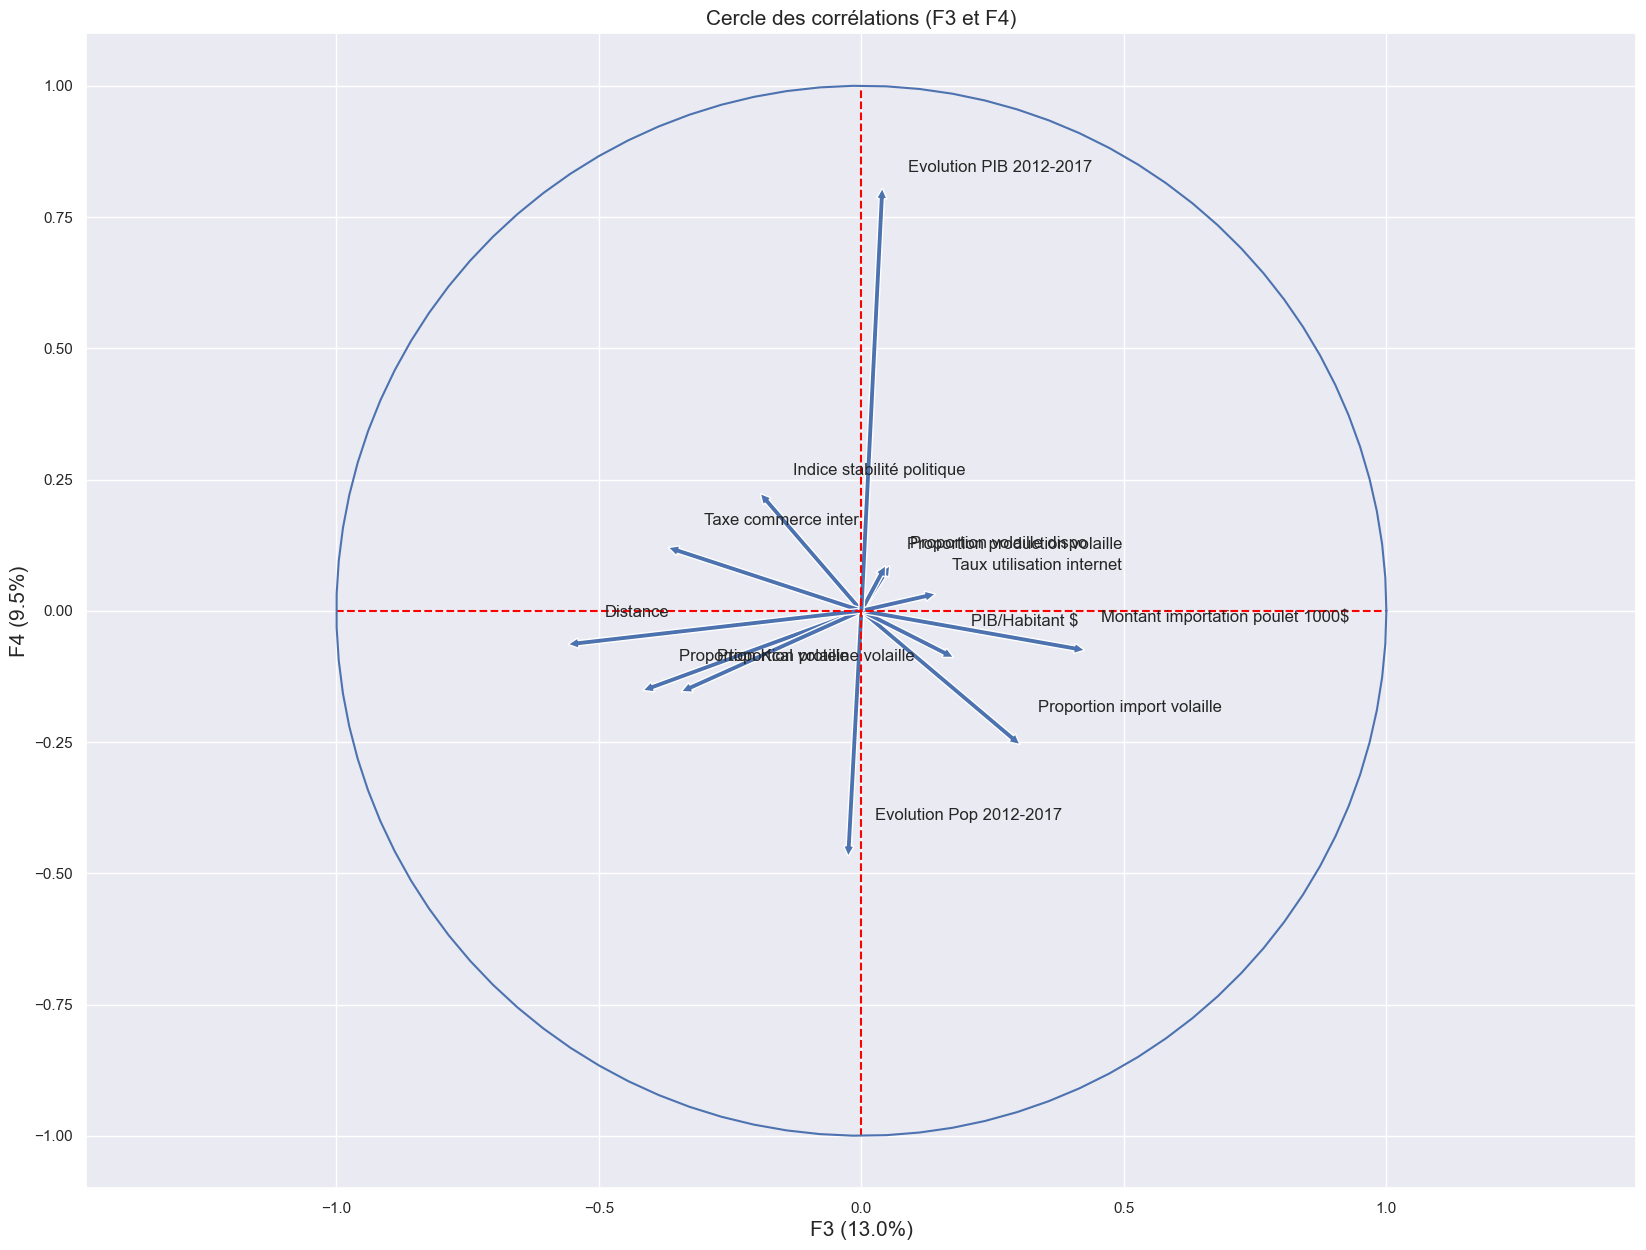

In [272]:
# Cercle de corrélation pour F3 et F4

correlation_graph(pca_reduced, (2, 3), features)

Les cercles de corrélation nous on permis de mieux visualiser les différentes corrélation entre nos variables et les différents axes.

### 4. Projection des données sur les axes

#### Critère de Kaiser pour determiner le nombre de dimension à retenir

In [273]:
# Critère de Kaiser

eigenvalues = pca_reduced.explained_variance_

# Comptage du nombre de valeurs propres supérieures à 1

num_dimensions = 0
for eigenvalue in eigenvalues:
    if eigenvalue > 1:
        num_dimensions += 1

print("Le nombre de dimensions à retenir selon le critère de Kaiser est:", num_dimensions)

Le nombre de dimensions à retenir selon le critère de Kaiser est: 5


In [274]:
# Calcul des coordonnées des individus

X_proj = pca_reduced.transform(X_scaled)

In [275]:
# Fonction pour afficher la projection des individus sur les axes

def display_factorial_planes(X_projected,
                             x_y,
                             pca=None,
                             labels=None,
                             clusters=None,
                             alpha=1,
                             figsize=[10, 8],
                             marker="."):

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # Pour l'affichage des labes
    if labels is None:
        labels = []
    try:
        len(labels)
    except Exception as e:
        raise e

    # On vérifie la variable axis
    if not len(x_y) == 2:
        raise AttributeError("2 axes sont demandées")
    if max(x_y) >= X_.shape[1]:
        raise AttributeError("La variable axis n'est pas bonne")

    # on définit x et y
    x, y = x_y

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=(20, 15))

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters

    # Les points
    plt.scatter(X_[:, x], X_[:, y], alpha=alpha,
                c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    if pca:
        v1 = str(round(100*pca.explained_variance_ratio_[x])) + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y])) + " %"
    else:
        v1 = v2 = ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() * 1.1
    y_max = np.abs(X_[:, y]).max() * 1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom=-y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='black', alpha=0.8)
    plt.plot([0, 0], [-y_max, y_max], color='black', alpha=0.8)

    # Affichage des labels des points
    if len(labels):

        for i, (_x, _y) in enumerate(X_[:, [x, y]]):
            plt.text(_x, _y+0.05, labels[i],
                     fontsize=14, ha='center', va='center')

    # Titre et display
    plt.title(f"Projection des individus sur F{x+1} et F{y+1}", fontsize=15)
    plt.show()

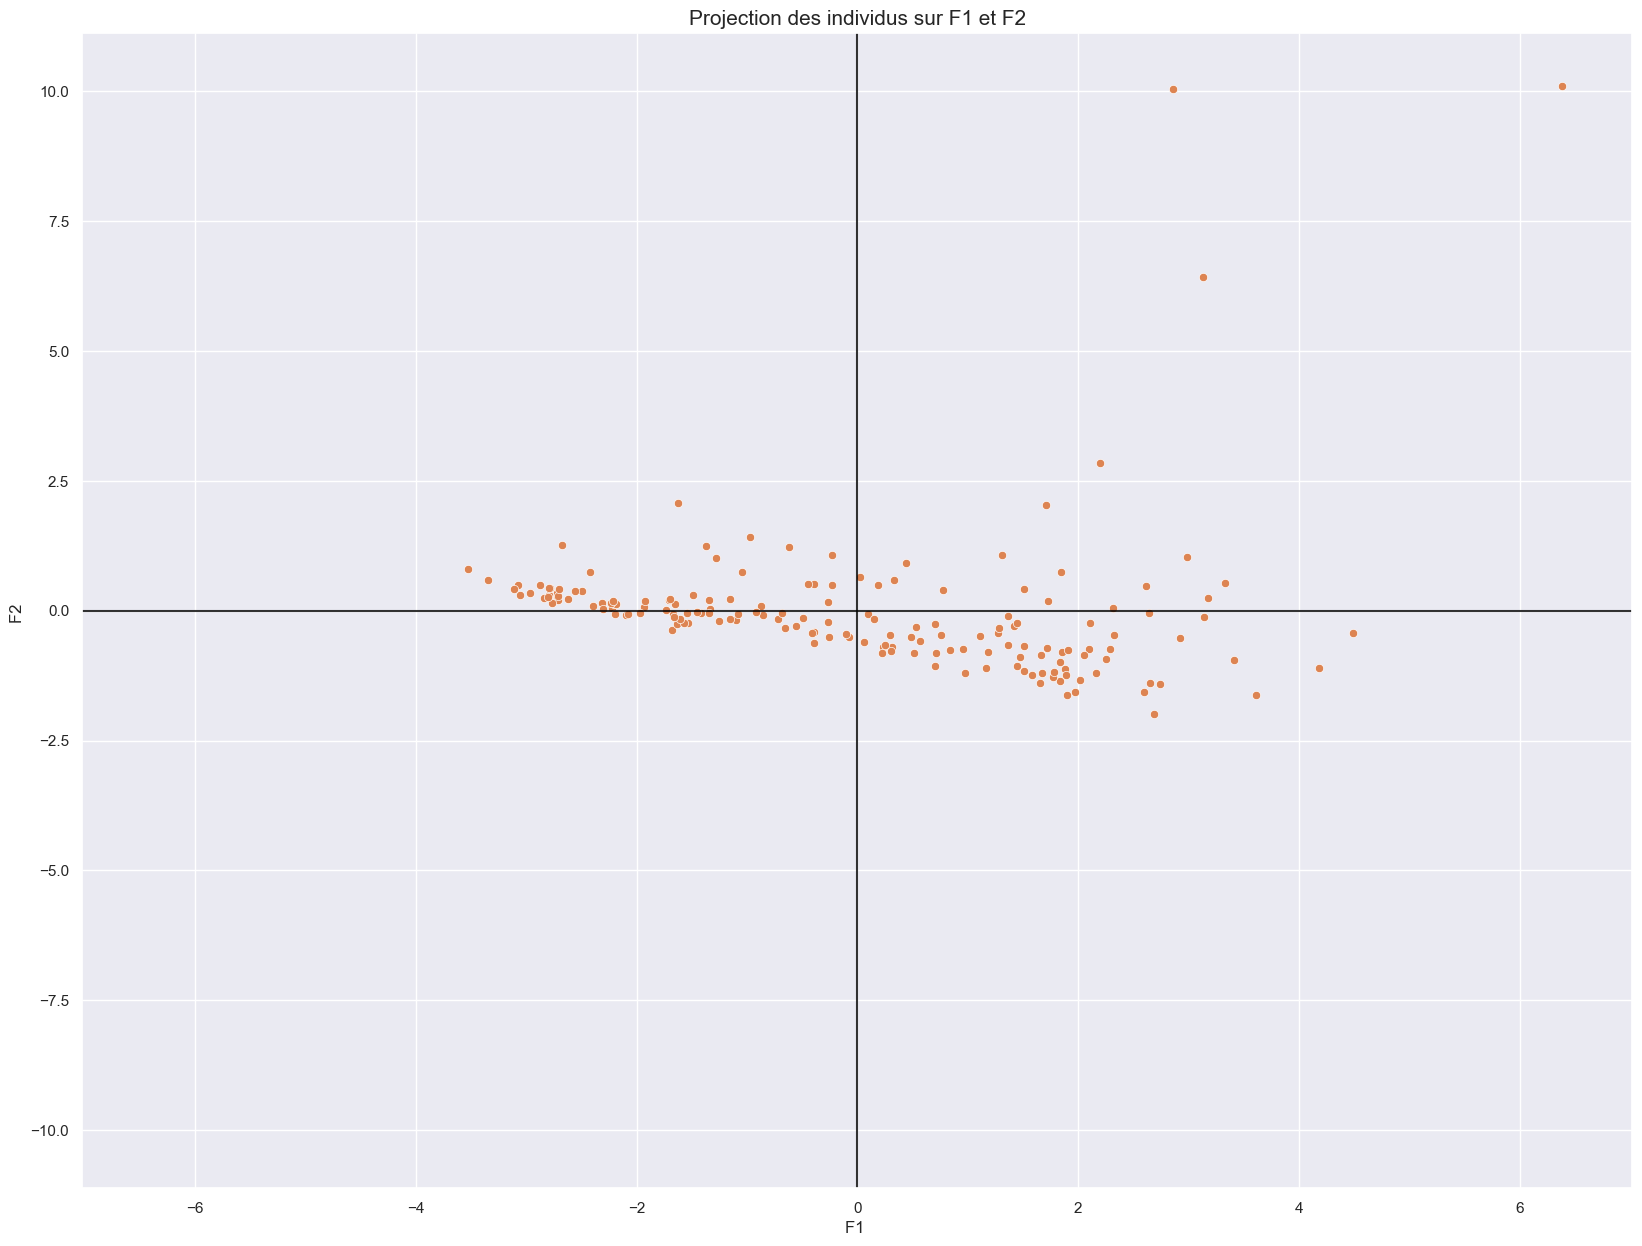

In [276]:
# Projection de F1 et F2 (Version simple)

x_y = [0, 1]

display_factorial_planes(X_proj, x_y)

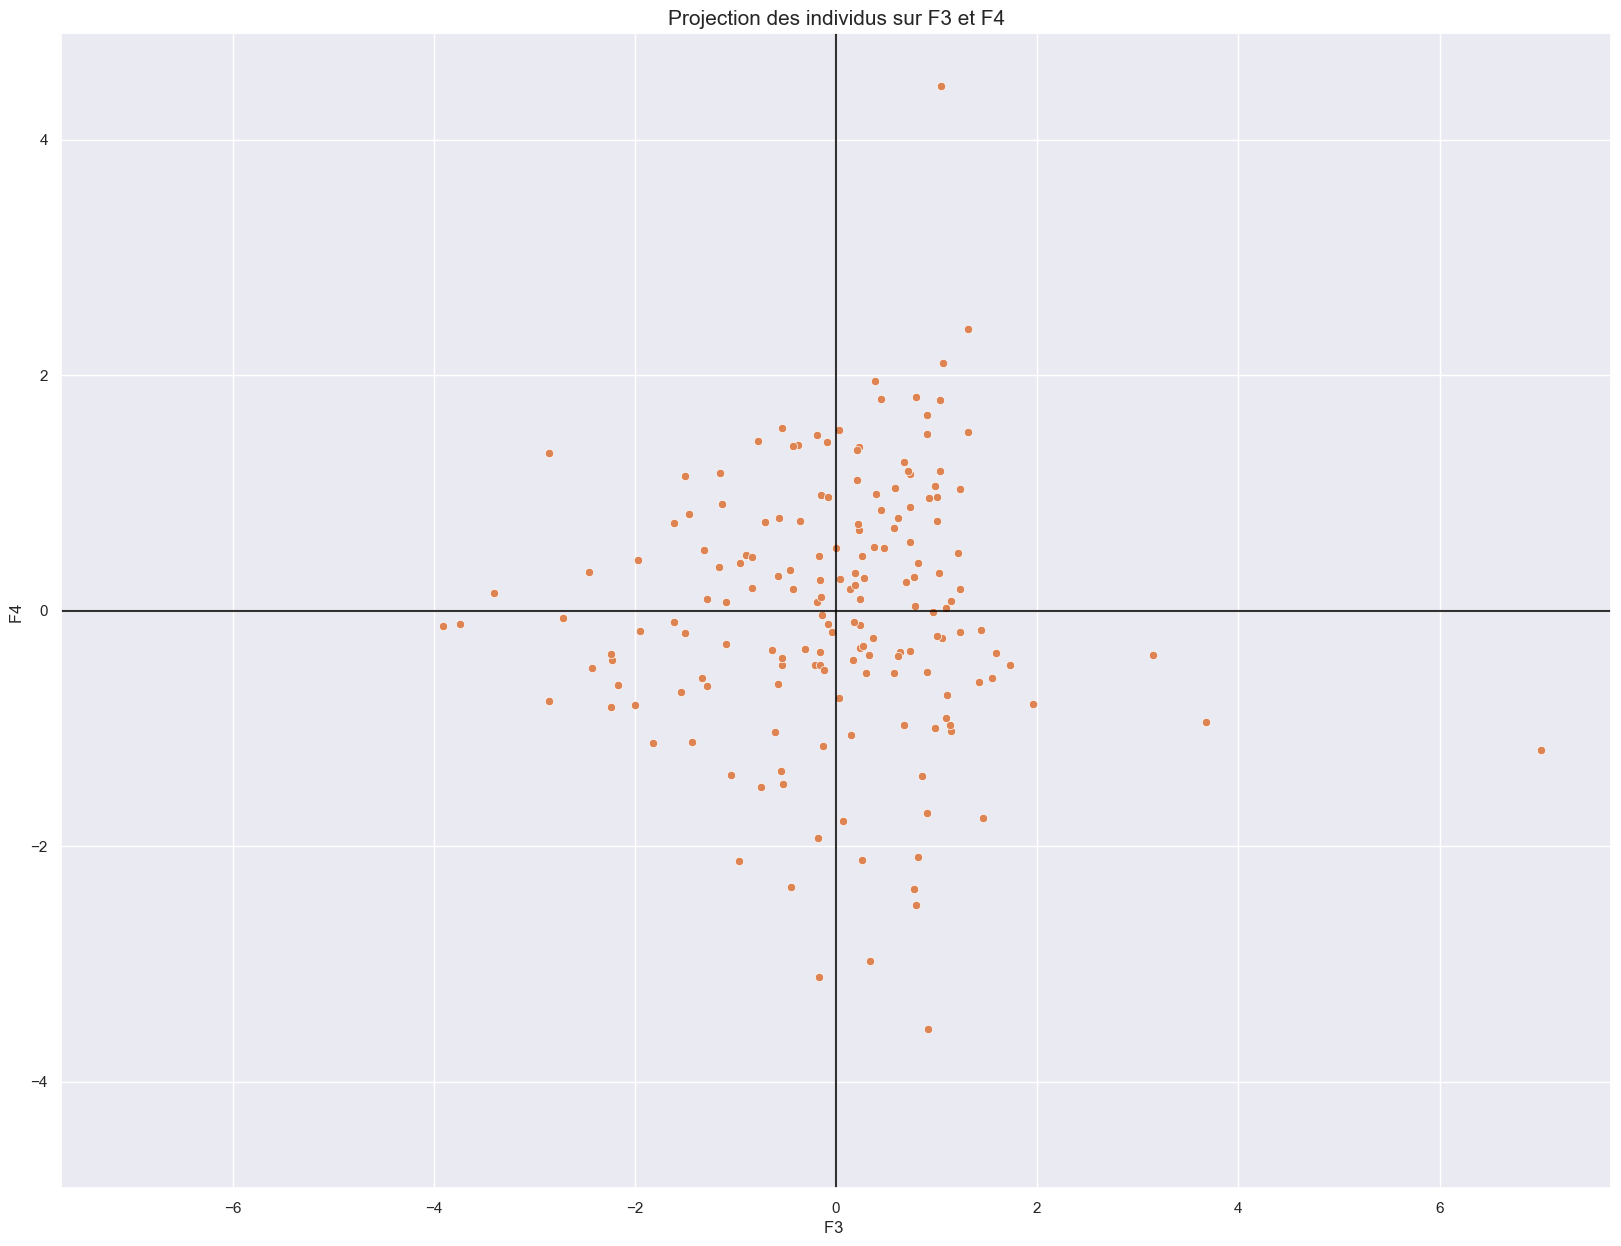

In [277]:
# Projection de F3 et F4 (Version simple)

x_y = [2, 3]

display_factorial_planes(X_proj, x_y)

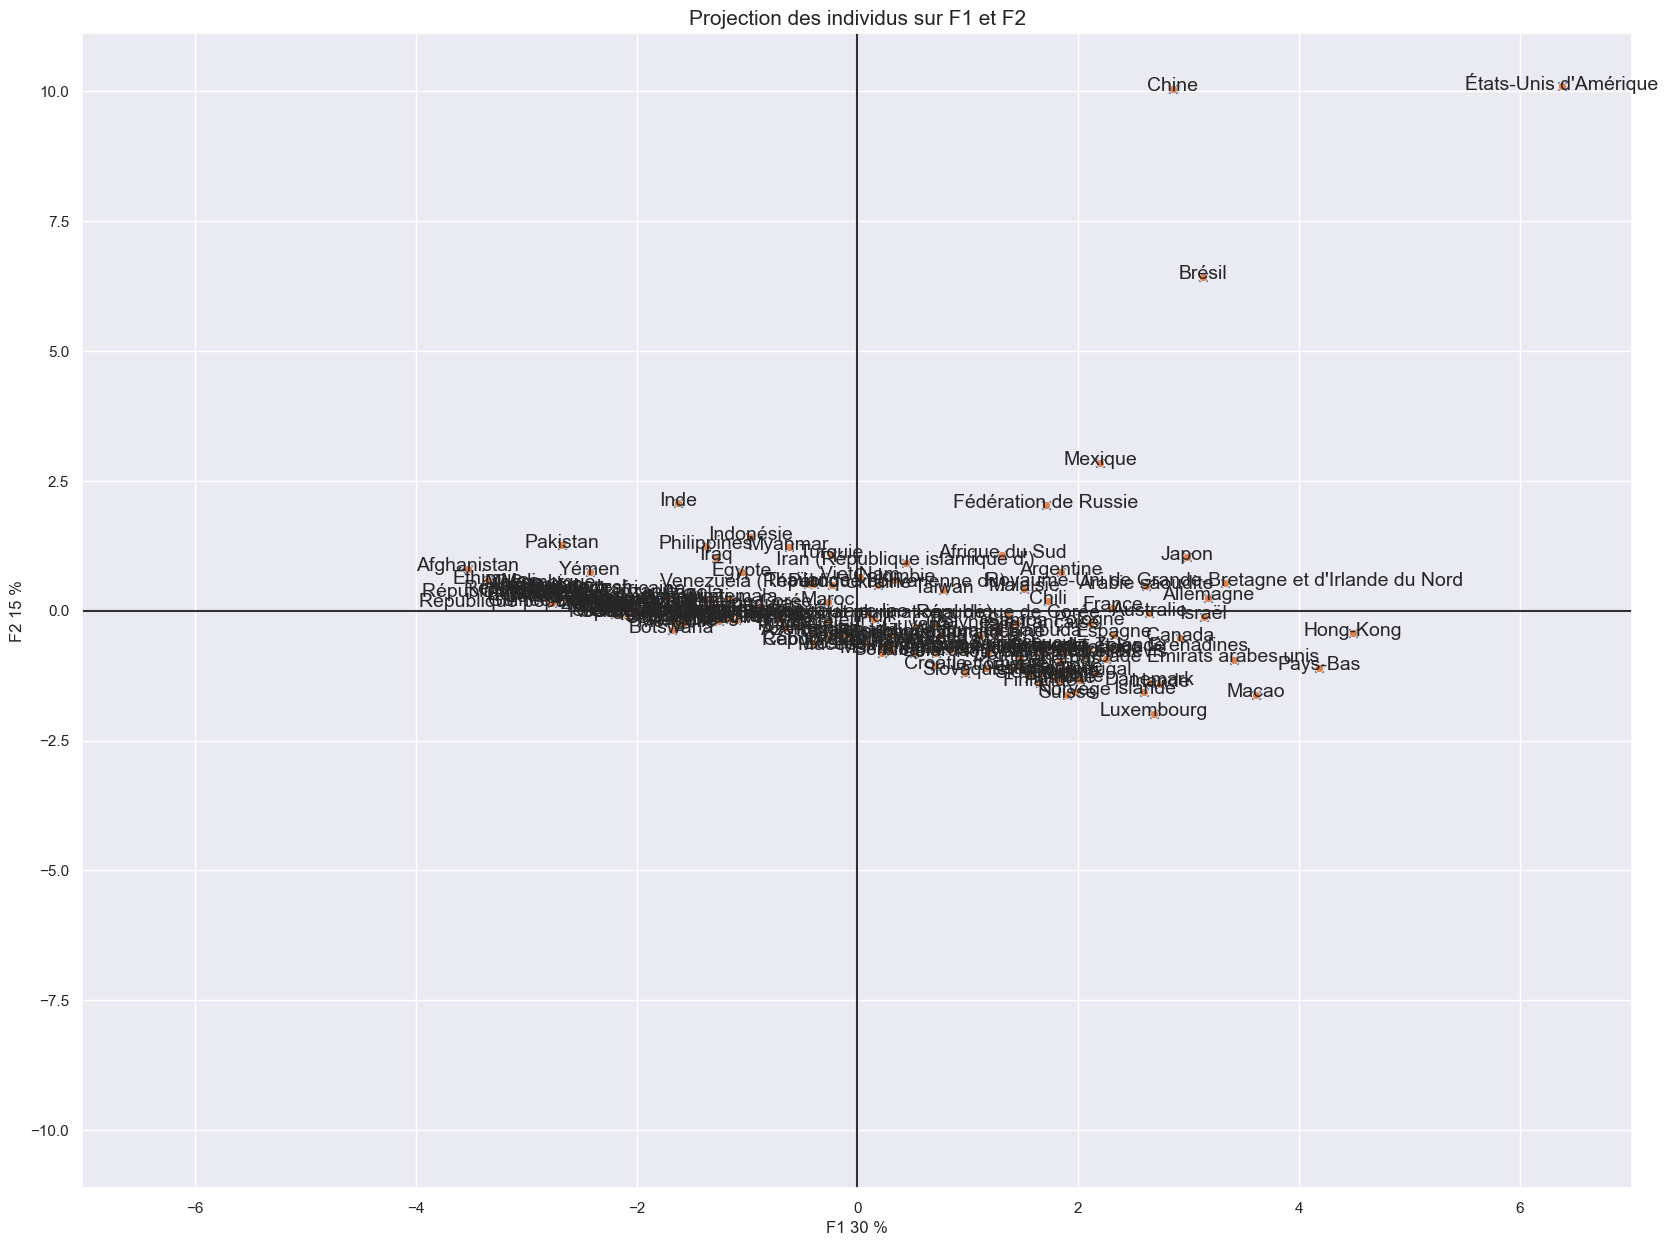

In [278]:
# Projection de F1 et F2 (Avec le nom des pays)

x_y = [0, 1]
display_factorial_planes(X_proj, x_y, pca_reduced, labels=names, marker="x")

Les pays se trouvant en haut à droite regroupent ceux qui ont une forte proportion de dispo de volaille et de production de volaille.

Les pays en bas à droite regroupent sont ceux qui ont un indice de stabilité politique élevée , un PIB/ habitant important et un taux d’utilisation d’internet

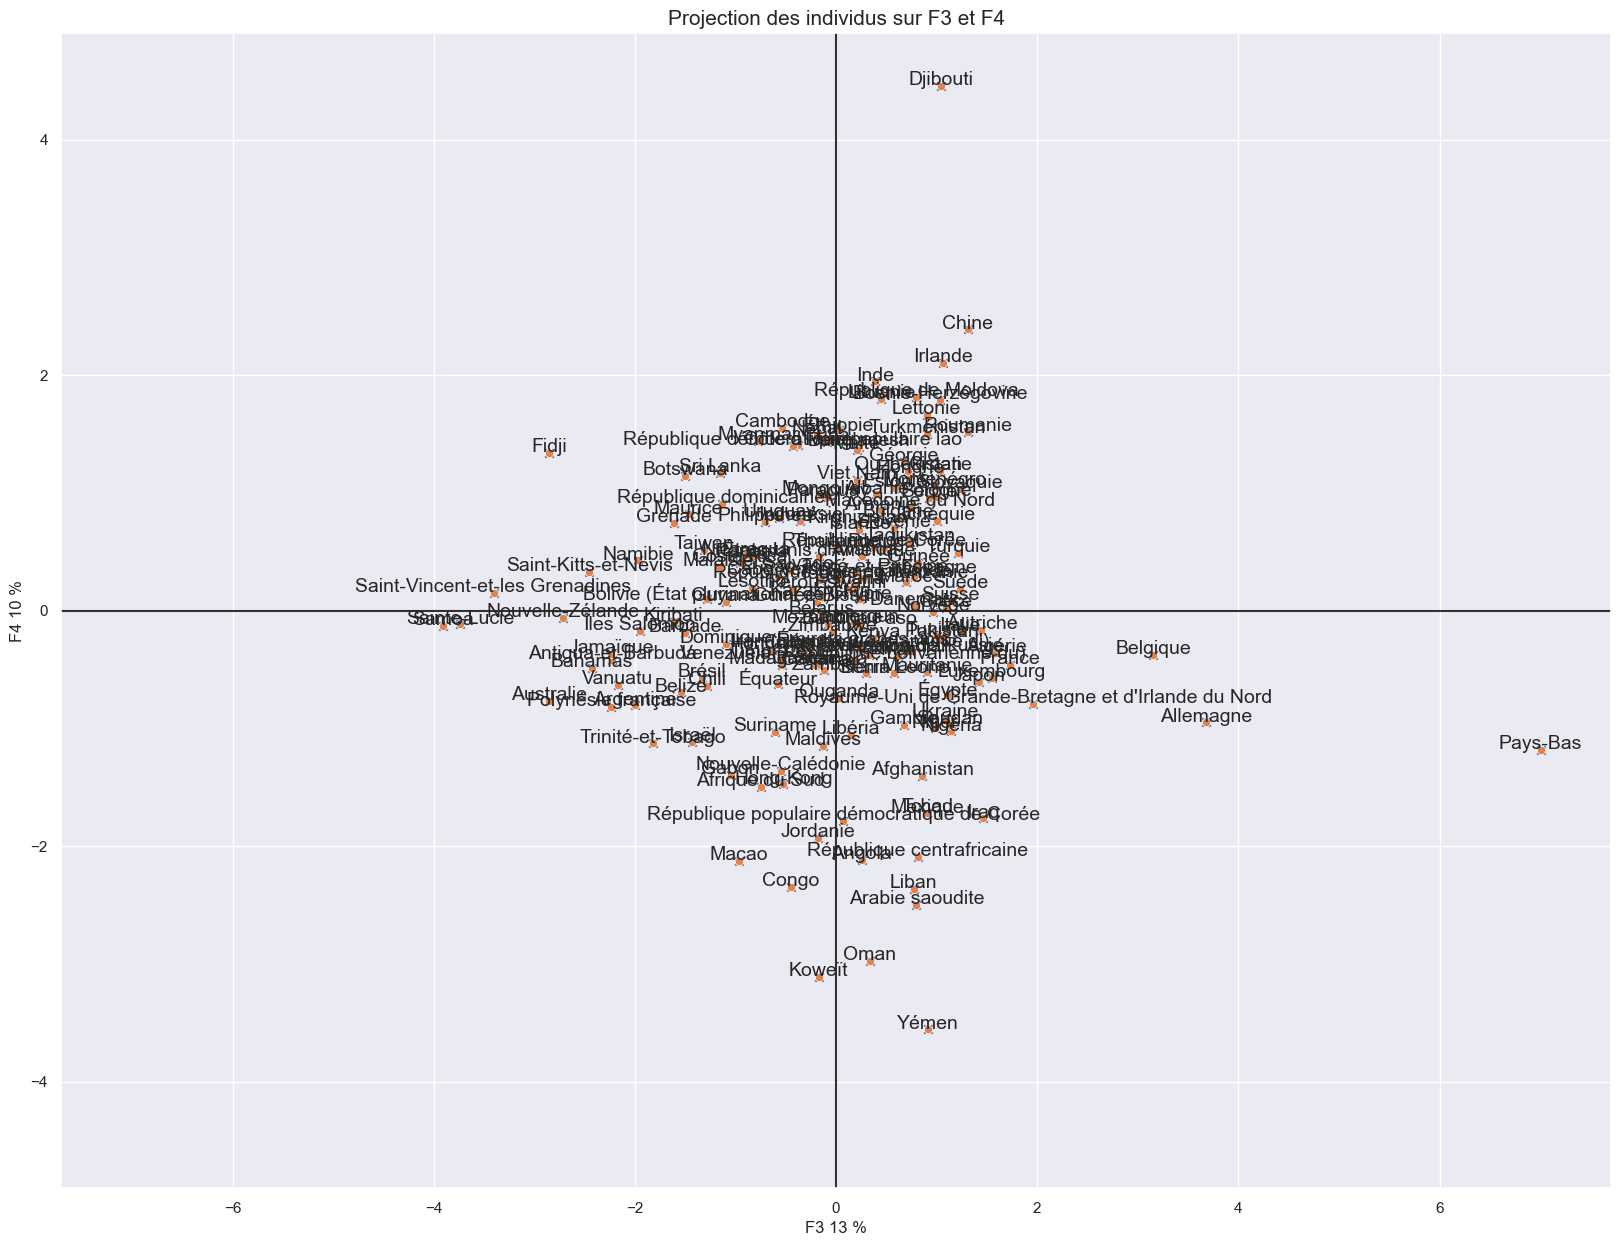

In [279]:
# Projection de F3 et F4 (Avec le nom des pays)

x_y = [2, 3]
display_factorial_planes(X_proj, x_y, pca_reduced, labels=names, marker="x")

Les pays se trouvant en bas à gauche regroupent ceux qui sont les plus éloignés de la France, qui ont une forte proportion Kcal et de protéine de volaille, ainsi que l’évolution de la population.

Ceux d’en bas à droite regroupent ceux ayant une grande proportion d’importation de volaille, et qui dépensent le plus pour l’importation de volaille.

### 5. Classification hiérarchique

In [280]:
# Calcul des distances

Z = linkage(X_scaled, method="ward")

pd.DataFrame(Z)

,0,1,2,3
0,59.0,148.0,0.300516,2.0
1,106.0,142.0,0.406424,2.0
2,23.0,28.0,0.458056,2.0
3,107.0,144.0,0.503485,2.0
4,88.0,100.0,0.619863,2.0
...,...,...,...,...
166,326.0,335.0,15.310952,46.0
167,117.0,338.0,17.090921,47.0
168,334.0,339.0,17.749468,84.0
169,322.0,340.0,24.066673,87.0


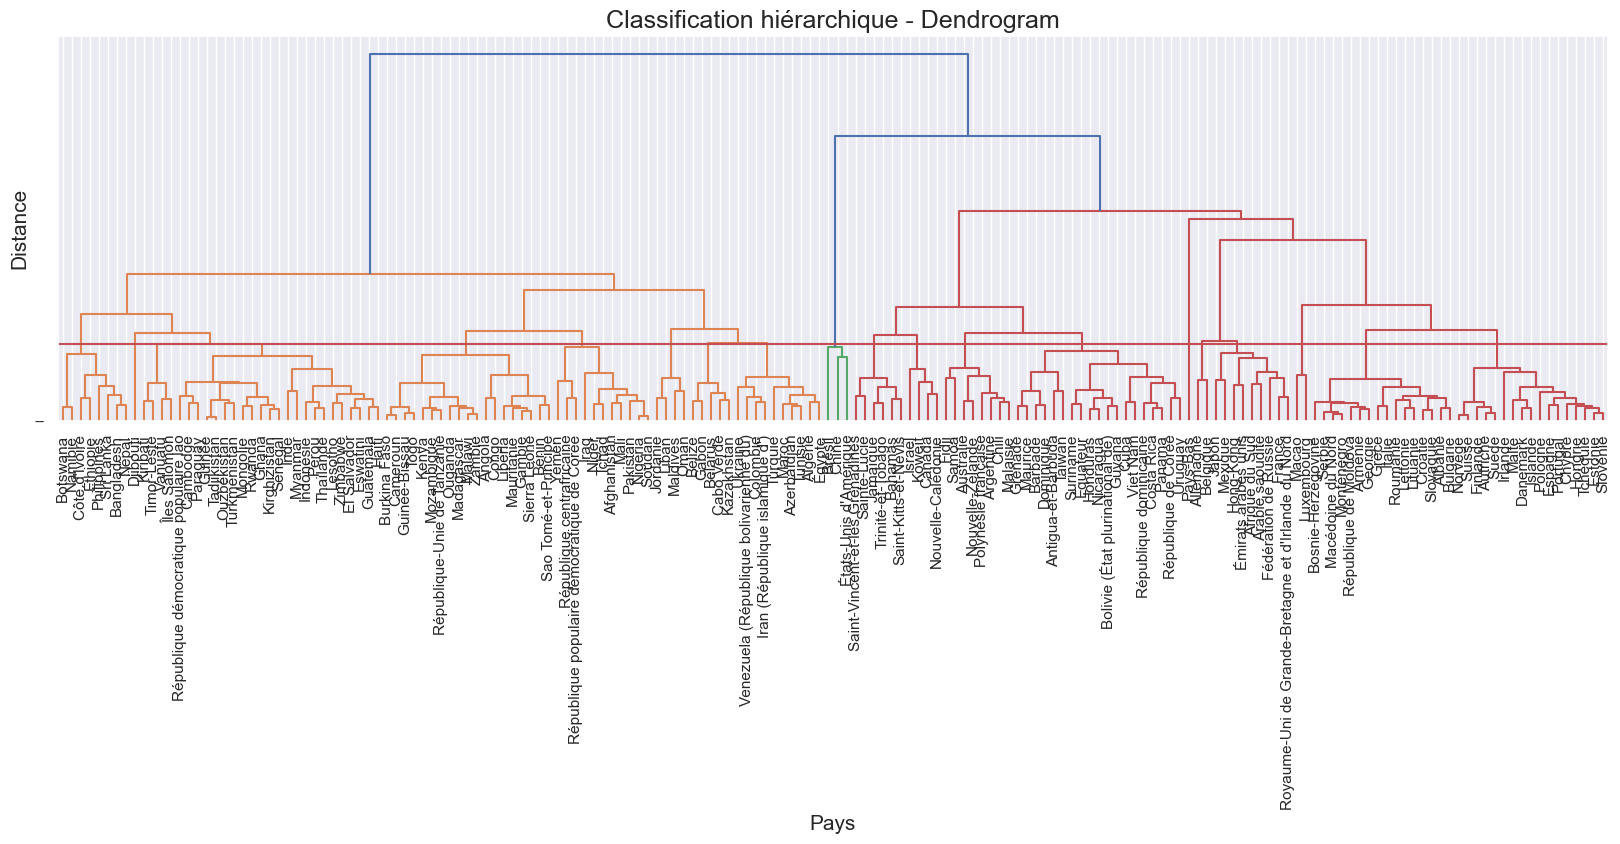

In [281]:
# Affichage du Dendrogramme

fig = plt.figure(figsize=(20, 5))

dendrogram(Z, labels=names, leaf_font_size=11, orientation='top')
sns.set_style('white')

slope = 0
intercept = 6.5
x_vals = np.array(plt.gca().get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, 'r', '--')


plt.title("Classification hiérarchique - Dendrogram", fontsize=18)
plt.xlabel("Pays", fontsize=15)
plt.ylabel("Distance", fontsize=15)
plt.show()

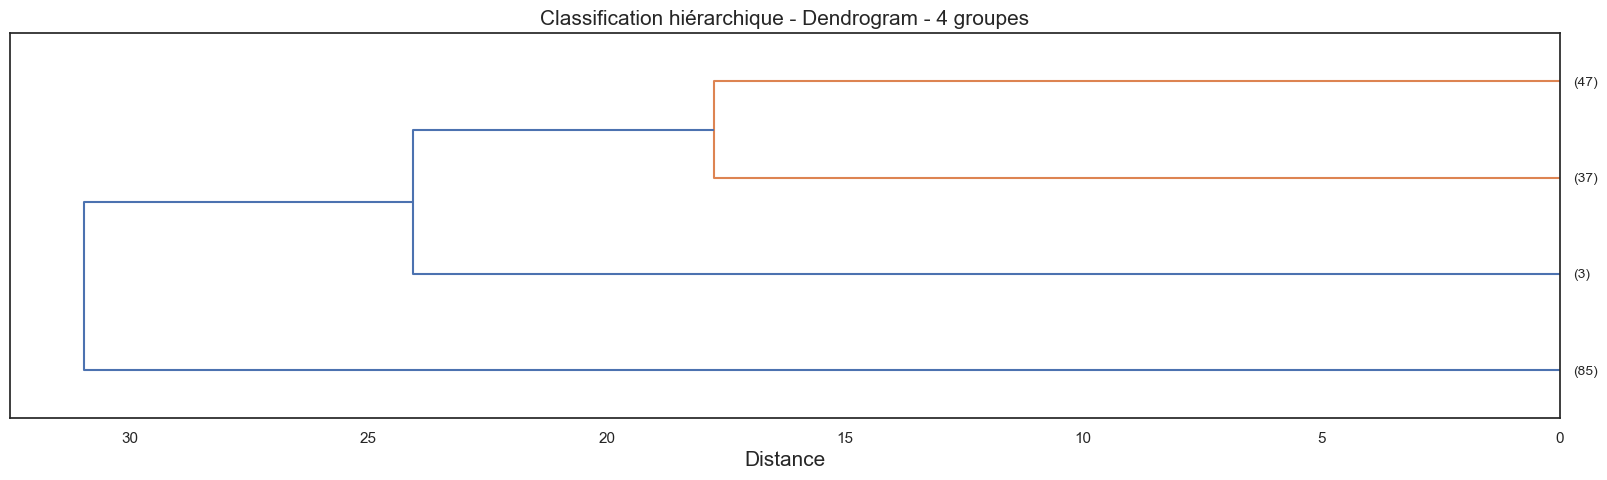

In [282]:
# Coupage du dendrogramme en 4 groupes

fig = plt.figure(figsize=(20, 5))
plt.title('Classification hiérarchique - Dendrogram - 4 groupes', fontsize=15)
plt.xlabel('Distance', fontsize=15)


dendrogram(Z, labels=names, p=4, truncate_mode='lastp',leaf_font_size=10, orientation='left')

plt.show()

In [283]:
# Identification des 4 groupes du dendrogramme

groupes_cah = fcluster(Z, 4, criterion='maxclust')

print('Numéro des groupes : ' + str(np.unique(groupes_cah)))

# Index des groupes

idg = np.argsort(groupes_cah)

# Affectation des groupes aux pays

df_groupes_cah = pd.DataFrame(analyse.index[idg], groupes_cah[idg]).reset_index()
df_groupes_cah = df_groupes_cah.rename(columns={'index': 'Groupe'})

Numéro des groupes : [1 2 3 4]


In [284]:
# Renommage des numéros de groupes

liste1 = [1,2,3,4]
liste2 = [0,1,2,3]

df_groupes_cah['Groupe'] = df_groupes_cah['Groupe'].replace(liste1, liste2)

In [285]:
# Ajout des groupes dans le data frame "analyse"

df_groupes_cah = pd.merge(analyse, df_groupes_cah, on='Zone')

df_groupes_cah.head()

,Zone,Proportion volaille dispo,Proportion Kcal volaille,Proportion proteine volaille,Proportion import volaille,Proportion production volaille,Evolution Pop 2012-2017,PIB/Habitant $,Indice stabilité politique,Montant importation poulet 1000$,Taxe commerce inter,Taux utilisation internet,Distance,Evolution PIB 2012-2017,Groupe
0,Afghanistan,0.00,0.00,0.00,0.00,0.00,16.48,2058.4,-2.80,26227.0,7.42,13.50,5594.22,-0.82,0
1,Afrique du Sud,0.02,0.03,0.10,0.03,0.01,7.91,13860.3,-0.28,7394.0,3.17,56.17,9306.64,-0.62,3
2,Albanie,0.00,0.02,0.04,0.00,0.00,-1.03,12771.0,0.38,3266.0,1.59,62.40,1603.94,13.74,3
3,Algérie,0.00,0.00,0.01,0.00,0.00,10.71,11737.4,-0.92,19051.0,0.00,47.69,1345.46,4.49,0
4,Allemagne,0.02,0.01,0.06,0.06,0.01,2.08,53071.5,0.59,193759.0,0.00,84.39,880.63,6.41,3


In [286]:
# Répartition des pays dans les groupes

df_groupe0_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 0]
df_groupe1_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 1]
df_groupe2_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 2]
df_groupe3_cah = df_groupes_cah[df_groupes_cah['Groupe'] == 3]

In [287]:
# Nombre de pays par groupe

print(str(len(df_groupes_cah[df_groupes_cah['Groupe'] == 0])) + " Pays dans le groupe 0")
print(str(len(df_groupes_cah[df_groupes_cah['Groupe'] == 1])) + "  Pays dans le groupe 1")
print(str(len(df_groupes_cah[df_groupes_cah['Groupe'] == 2])) + " Pays dans le groupe 2")
print(str(len(df_groupes_cah[df_groupes_cah['Groupe'] == 3])) + " Pays dans le groupe 3")

85 Pays dans le groupe 0
3  Pays dans le groupe 1
37 Pays dans le groupe 2
47 Pays dans le groupe 3


In [288]:
# Moyenne des groupes / Centroïde

groupe = df_groupes_cah.groupby('Groupe').mean()
groupe['NB Pays'] = df_groupes_cah.Groupe.value_counts()
groupe

,Proportion volaille dispo,Proportion Kcal volaille,Proportion proteine volaille,Proportion import volaille,Proportion production volaille,Evolution Pop 2012-2017,PIB/Habitant $,Indice stabilité politique,Montant importation poulet 1000$,Taxe commerce inter,Taux utilisation internet,Distance,Evolution PIB 2012-2017,NB Pays
Groupe,,,,,,,,,,,,,,
0,0.002471,0.005529,0.023294,0.002235,0.002235,11.104706,7257.040000,-0.607765,5022.679326,6.546000,33.222235,6484.223059,9.288471,85
1,0.140000,0.030000,0.093333,0.013333,0.160000,3.490000,29653.400000,-0.060000,16432.000000,1.626667,69.680000,8171.403333,12.553333,3
2,0.002703,0.030811,0.093784,0.002432,0.002973,4.891081,22311.491892,0.477027,5387.162162,4.638108,62.509189,9151.438378,9.259730,37
3,0.004468,0.016596,0.064681,0.013617,0.004468,1.540851,40830.351064,0.496596,38835.893617,0.730213,79.702128,2493.382340,11.463830,47


Le groupe 2 est celui qui à le plus haut taux de proportion de protéine et de proportion de Kcal de volaille, suivi de très près par le groupe 1.

Le groupe 1 à également une moyenne importante de montant d'importation de volaille.
Le groupe 2 malgré une forte proportion de protéine de volaille à malheureusement un faible taux de production et d'importation de volaille.

Le groupe 3 est celui qui importe le plus de volaille et en consequent celui qui depense le plus pour importer les volailles, une proportion de protéine et de proportion de Kcal de volaille non négligeable. Le groupe 3 possède également le PIB/Habitant le plus important.

Le groupe 3 est celui qui est le plus proche de la france, avec une bonne stabilité politique, un faible. taux de taxe sur le commerce international, et une moyenne importante d'utilisation d'internet.

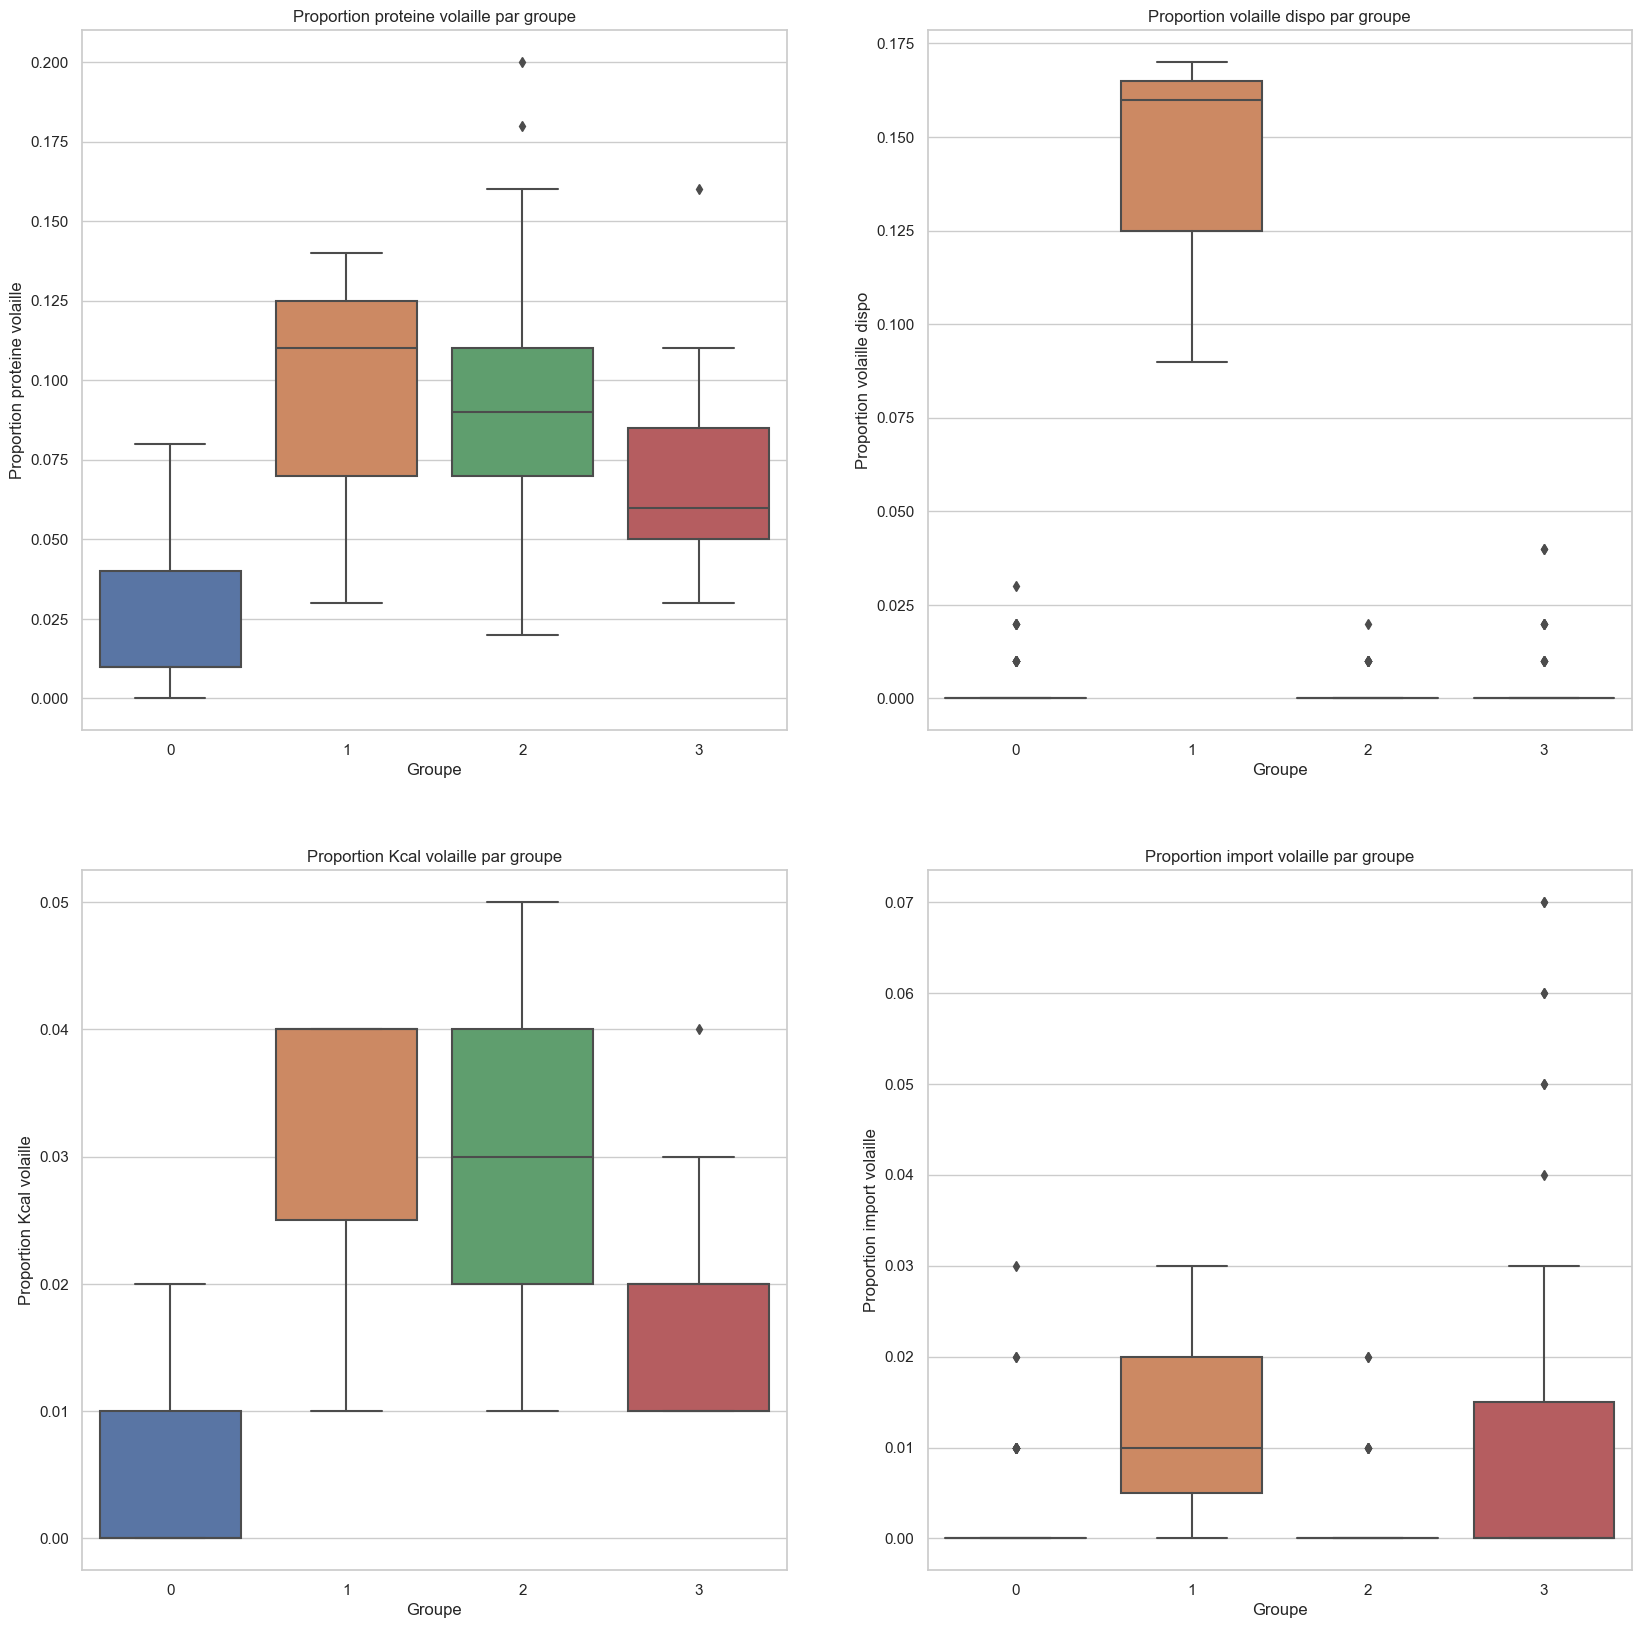

In [289]:
# Aperçu visuelle des groupes par Boxplot, en abscisse les numéros des groupes

plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

# Proportion proteine volaille par groupe

plt.subplot(221)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Proportion proteine volaille')
plt.title('Proportion proteine volaille par groupe')

# Proportion volaille dispo par groupe

plt.subplot(222)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Proportion volaille dispo')
plt.title('Proportion volaille dispo par groupe')

# Proportion Kcal volaille par groupe

plt.subplot(223)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Proportion Kcal volaille')
plt.title('Proportion Kcal volaille par groupe')

# Proportion import volaille par groupe

plt.subplot(224)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Proportion import volaille')
plt.title('Proportion import volaille par groupe')

plt.show()

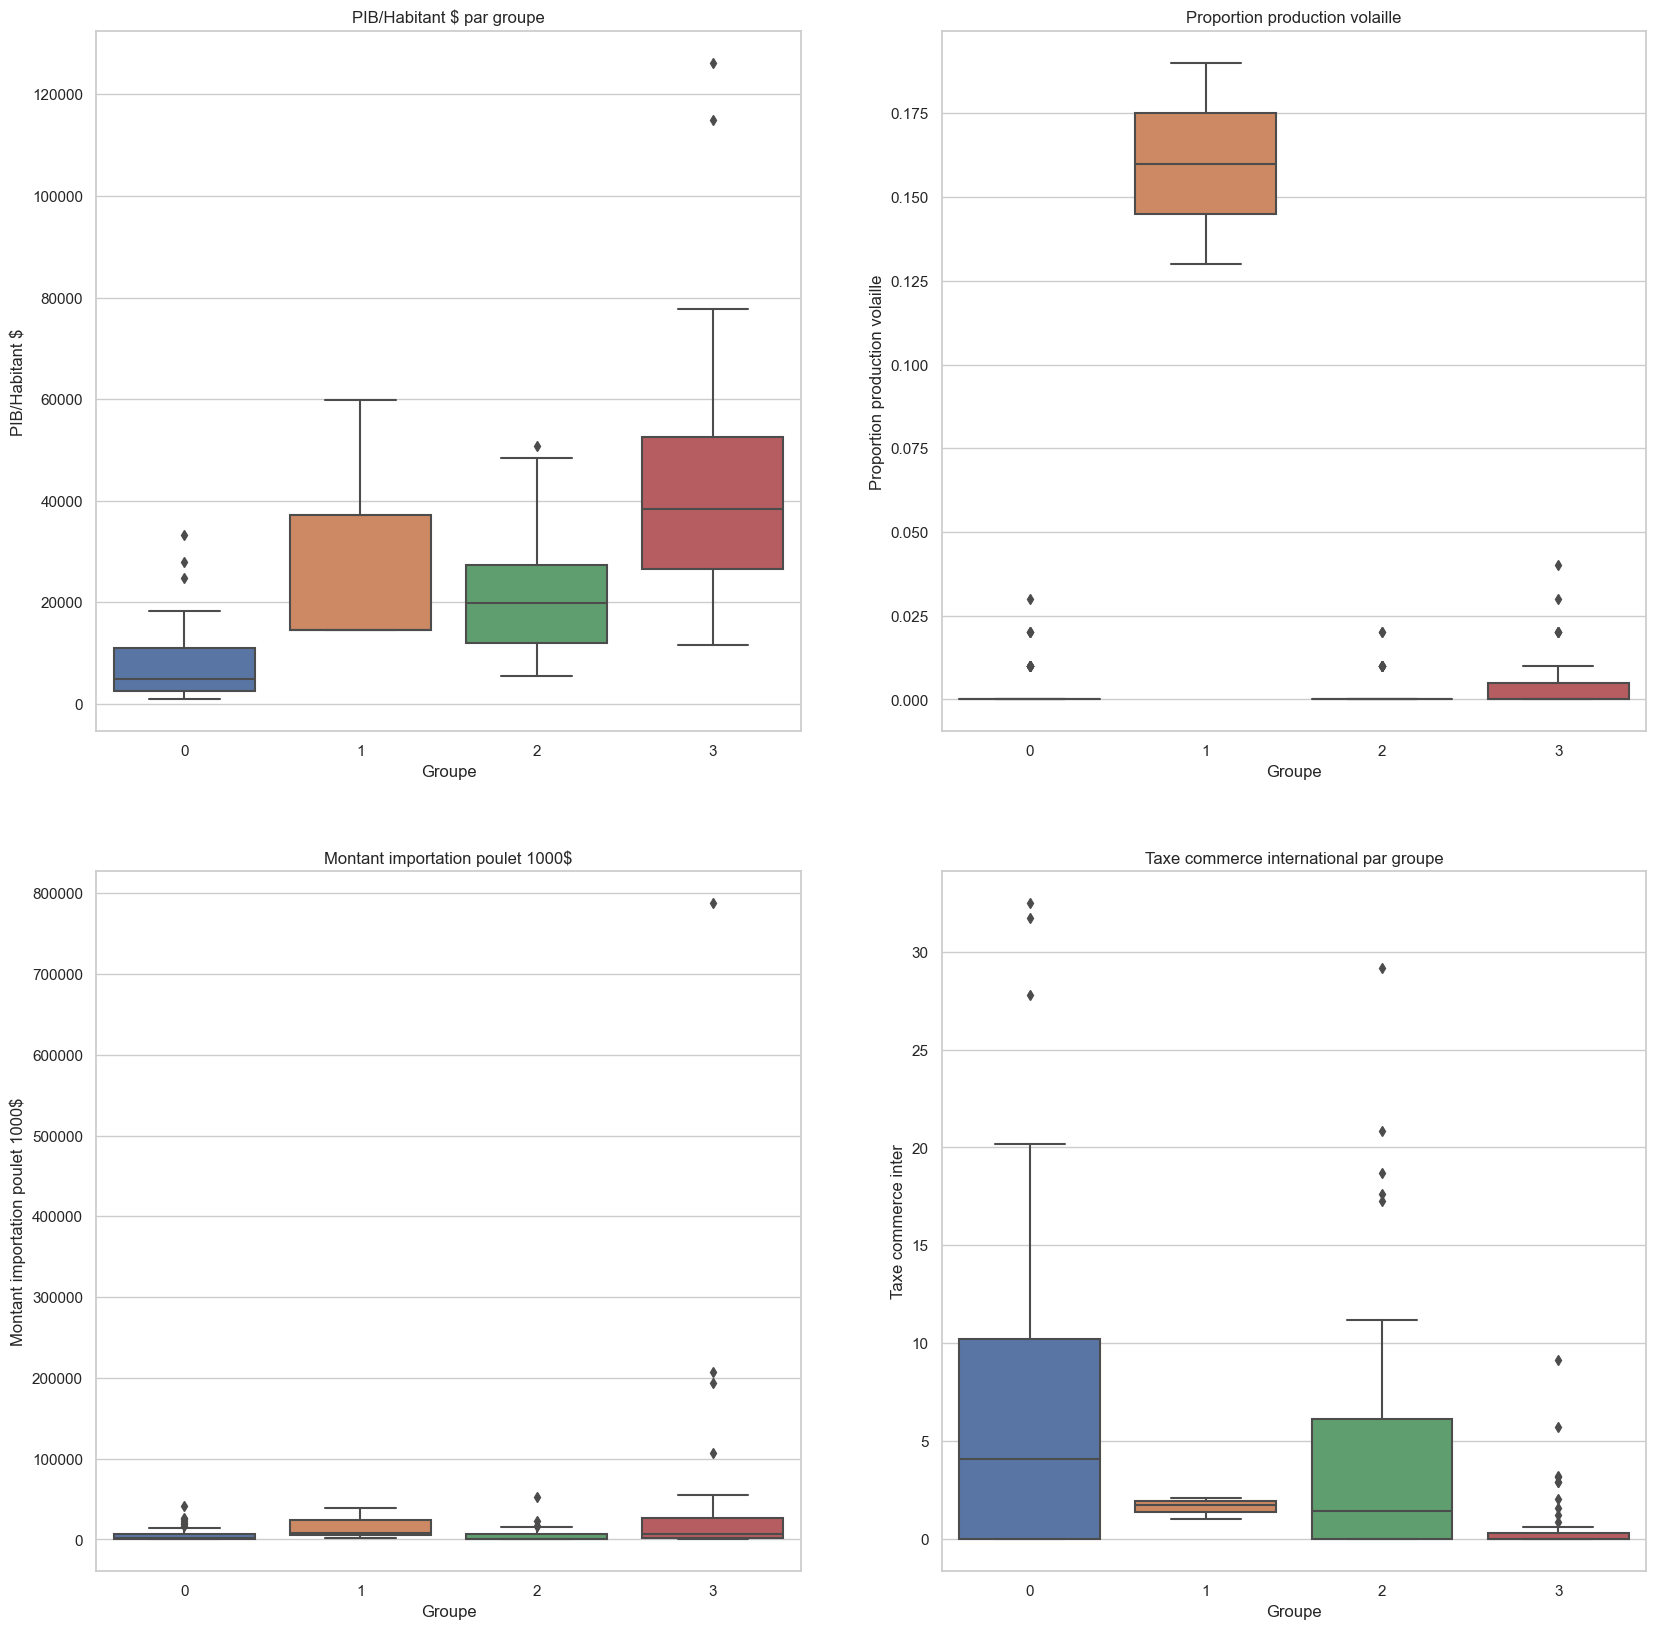

In [290]:
# Aperçu visuelle des groupes par Boxplot, en abscisse les numéros des groupes

plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

# PIB/Habitant $ par groupe

plt.subplot(221)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='PIB/Habitant $')
plt.title('PIB/Habitant $ par groupe')

# Proportion production volaille par groupe

plt.subplot(222)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Proportion production volaille')
plt.title('Proportion production volaille')

# Montant importation poulet 1000$ par groupe

plt.subplot(223)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Montant importation poulet 1000$')
plt.title('Montant importation poulet 1000$')

# Taxe commerce international par groupe

plt.subplot(224)
sns.boxplot(data=df_groupes_cah, x='Groupe', y='Taxe commerce inter')
plt.title('Taxe commerce international par groupe')

plt.show()

Les boxplot confirment nos premières observations faites plus haut sur nos moyennes.

<b> Si on se base sur la proportion de protéine et de proportion de Kcal de volaille, le groupe à retenir est le groupe 2 mais également le groupe 1.

<b>Mais si on se base sur l'importance des depenses et de la quantité d'importation de volaille, c'est le groupe 3 qui sera retenu.</b>

In [291]:
# Pays du groupe 1

print(df_groupes_cah[df_groupes_cah['Groupe'] == 1]['Zone'].unique())

['Brésil' 'Chine' "États-Unis d'Amérique"]


In [292]:
# Pays du groupe 2

print(df_groupes_cah[df_groupes_cah['Groupe'] == 2]['Zone'].unique())

['Antigua-et-Barbuda' 'Argentine' 'Australie' 'Bahamas' 'Barbade'
 'Bolivie (État plurinational de)' 'Canada' 'Chili' 'Taiwan' 'Costa Rica'
 'Cuba' 'Dominique' 'Fidji' 'Grenade' 'Guyana' 'Honduras' 'Israël'
 'Jamaïque' 'Koweït' 'Malaisie' 'Maurice' 'Nicaragua' 'Nouvelle-Calédonie'
 'Nouvelle-Zélande' 'Panama' 'Polynésie française' 'République de Corée'
 'République dominicaine' 'Saint-Kitts-et-Nevis'
 'Saint-Vincent-et-les Grenadines' 'Sainte-Lucie' 'Samoa' 'Suriname'
 'Trinité-et-Tobago' 'Uruguay' 'Viet Nam' 'Équateur']


In [293]:
# Pays du groupe 3

print(df_groupes_cah[df_groupes_cah['Groupe'] == 3]['Zone'].unique())

['Afrique du Sud' 'Albanie' 'Allemagne' 'Arabie saoudite' 'Arménie'
 'Autriche' 'Belgique' 'Bosnie-Herzégovine' 'Bulgarie' 'Hong-Kong' 'Macao'
 'Chypre' 'Croatie' 'Danemark' 'Espagne' 'Estonie' 'Finlande' 'France'
 'Fédération de Russie' 'Grèce' 'Géorgie' 'Hongrie' 'Irlande' 'Islande'
 'Italie' 'Japon' 'Lettonie' 'Lituanie' 'Luxembourg' 'Macédoine du Nord'
 'Malte' 'Mexique' 'Monténégro' 'Norvège' 'Pays-Bas' 'Pologne' 'Portugal'
 'Roumanie' "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"
 'République de Moldova' 'Serbie' 'Slovaquie' 'Slovénie' 'Suisse' 'Suède'
 'Tchéquie' 'Émirats arabes unis']


In [294]:
# Liste des pays des groupes 1, 2 & 3, enregistrement des pays dans la variable "df_cah_subset"

df_cah_subset = df_groupes_cah.query('[1,2,3] in Groupe')

df_cah_subset.shape

(87, 15)

<b> L'union des groupes 1, 2 et 3 contient 87 pays. </b>

In [295]:
# Visualisation des pays du groupe 1,2 et 3

df_cah_subset.head()

,Zone,Proportion volaille dispo,Proportion Kcal volaille,Proportion proteine volaille,Proportion import volaille,Proportion production volaille,Evolution Pop 2012-2017,PIB/Habitant $,Indice stabilité politique,Montant importation poulet 1000$,Taxe commerce inter,Taux utilisation internet,Distance,Evolution PIB 2012-2017,Groupe
1,Afrique du Sud,0.02,0.03,0.10,0.03,0.01,7.91,13860.3,-0.28,7394.0,3.17,56.17,9306.64,-0.62,3
2,Albanie,0.00,0.02,0.04,0.00,0.00,-1.03,12771.0,0.38,3266.0,1.59,62.40,1603.94,13.74,3
4,Allemagne,0.02,0.01,0.06,0.06,0.01,2.08,53071.5,0.59,193759.0,0.00,84.39,880.63,6.41,3
6,Antigua-et-Barbuda,0.00,0.05,0.13,0.00,0.00,5.55,19840.3,0.75,35.0,0.00,0.00,6711.07,10.43,2
7,Arabie saoudite,0.01,0.03,0.11,0.05,0.01,13.54,47306.2,-0.64,17495.0,2.91,94.18,4686.62,-1.50,3


### 6. Identification du nombre de cluster par Kmeans

<b> Détermination de la valeur K (Nombre de clusters optimal) </b>

In [296]:
# Méthode du Coude

# Mise en place d'une liste pour stocker les inerties

intertia = []

# Liste du nombre de clusters à tester

k_list = range(2, 10)

# Test des clusters

for i in k_list:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    intertia.append(kmeans.inertia_)

In [297]:
# Liste d'inertie

intertia

[1732.4894067163336,
 1444.4658247092193,
 1275.015004521531,
 1129.5632420066013,
 1014.0335660008521,
 922.5742977806319,
 850.0010428398359,
 799.7968715793893]

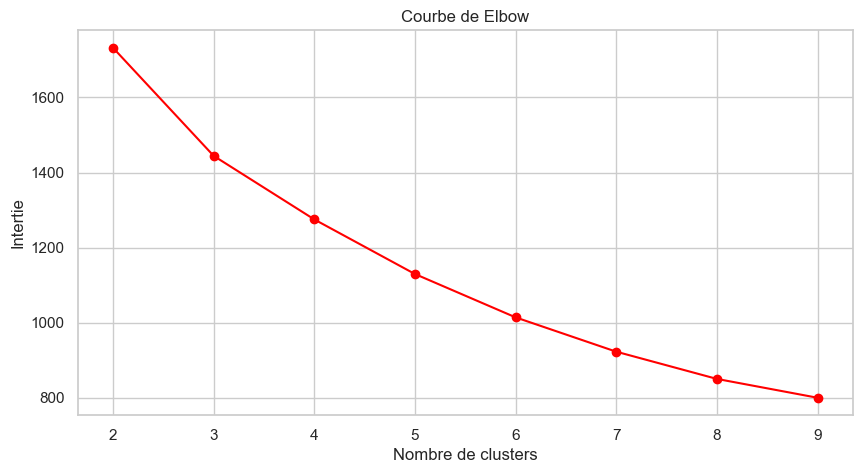

In [298]:
# Affichage du résultat

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.set_ylabel("Intertie")
ax.set_xlabel("Nombre de clusters")
plt.title('Courbe de Elbow')
ax = plt.plot(k_list, intertia, marker='o',color = 'red')

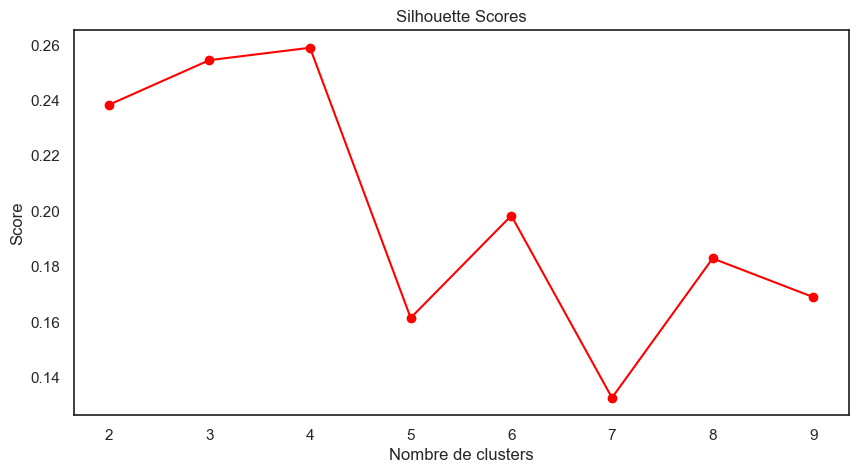

In [216]:
# Silhouette score

# Mise en place d'une liste pour stocker nos coefficients

silhouettes = []

# Boucle itérative de 2 à 10 (clusters) pour tester les différentes possibilités

for num_clusters in range(2, 10):
    cls = cluster.KMeans(n_clusters=num_clusters,
                         n_init=1, init='random')
    cls.fit(X_scaled)
    silh = metrics.silhouette_score(X_scaled, cls.labels_)
    
    # Stockage des coefficients
    
    silhouettes.append(silh)

plt.figure(figsize=(10, 5))
plt.title("Silhouette Scores")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score")
plt.plot(range(2, 10), silhouettes, marker=('o'),color = 'red')

plt.show()

Si on se fie à la courbe de Elbow, on va rétenir K = 3 ou K = 4.

Le coefficient de silhouettes avec un K = 4 devra également être considéré dans notre analyse.

On va donc effectuer un clustering avec K = 3 et ensuite K = 4 et observer les résultats obtenus.

Ainsi avec K = 4, cela nous permettra de comparer les résultats avec le découpage effectué avec le dendrogramme.

#### Application de l’algorithme de K Means

In [299]:
# Clustering K-Means avec 3 clusters

cls3 = cluster.KMeans(n_clusters=3)
cls3.fit(X_scaled)

KMeans(n_clusters=3)

In [300]:
# Clustering K-Means avec 4 clusters

cls4 = cluster.KMeans(n_clusters=4)
cls4.fit(X_scaled)

KMeans(n_clusters=4)

In [301]:
# Récupération des clusters attribués à chaque pays

clusters_kmeans3 = cls3.labels_
clusters_kmeans4 = cls4.labels_

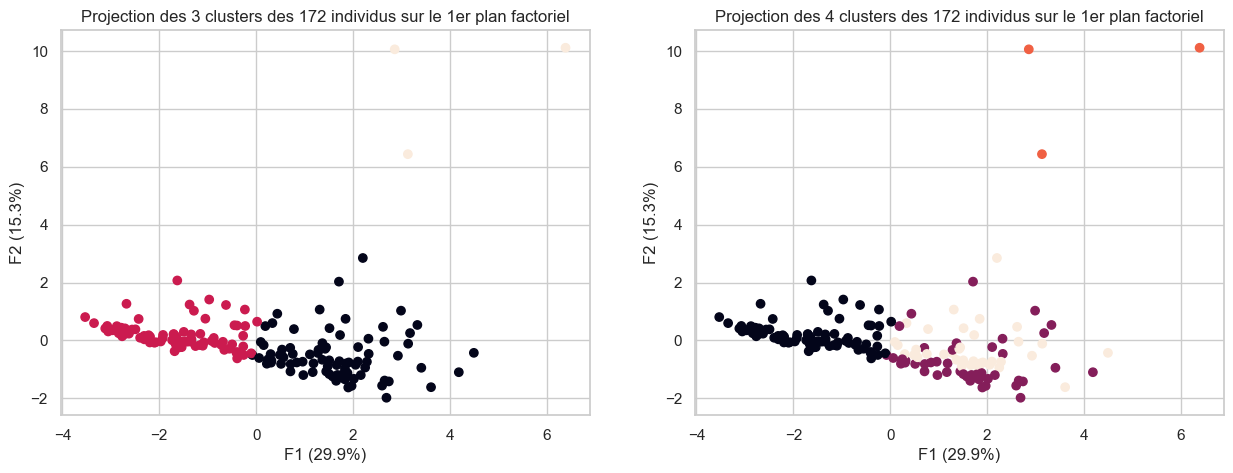

In [302]:
# Coordonnées factorielles des clusters afin de les projeter sur le premier plan factoriel

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=cls3.labels_)
plt.xlabel('F{} ({}%)'.format(
    1, round(100*pca_reduced.explained_variance_ratio_[0], 1)))
plt.ylabel('F{} ({}%)'.format(
    2, round(100*pca_reduced.explained_variance_ratio_[1], 1)))
plt.title("Projection des 3 clusters des {} individus sur le 1er plan factoriel".format(
    X_proj.shape[0]))

plt.subplot(122)
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=clusters_kmeans4)
plt.xlabel('F{} ({}%)'.format(
    1, round(100*pca_reduced.explained_variance_ratio_[0], 1)))
plt.ylabel('F{} ({}%)'.format(
    2, round(100*pca_reduced.explained_variance_ratio_[1], 1)))
plt.title("Projection des 4 clusters des {} individus sur le 1er plan factoriel".format(
    X_proj.shape[0]))

plt.show()

On peut observer qu'il est bien possible de faire la projection en 3 clusters, les 3 groupes sont bien distincts. mais avec 3 clusters, on se retrouve avec un cluster qui a un seul pays. Mais afin d'avoir une analyse un peu plus poussée et éviter d'avoir un cluster contenant qu'un seul pays, nous allons continuer notre analyse avec 4 clusters.

Il faut aussi rappeler qu'on a retenu 4 clusters dans notre dendrogramme, ce qui nous permettra de comparer les résultats.

Nous allons donc procéder à la caractérisation de nos différents clusters à travers la méthode de Kmeans

In [303]:
# Initialisation du nombre de clusters

# Nombre de clusters

n_clust = 4

kmeans = KMeans(n_clusters=n_clust)
kmeans.fit(X_scaled)

kmCentroids = KMeans(n_clusters=n_clust, random_state=None)
kmCentroids.fit(X_scaled)
centroidsR = kmeans.cluster_centers_

Y = X_scaled
km = KMeans(n_clusters=n_clust, random_state=None)
km.fit(Y)


clusters = km.labels_

# Affichage des individus et des centres de clusters sur le plan factoriel

pca2 = decomposition.PCA(n_components=6).fit(Y)
Y_projected = pca2.transform(Y)

centroids = km.cluster_centers_
centroids_projected = pca2.transform(centroids)

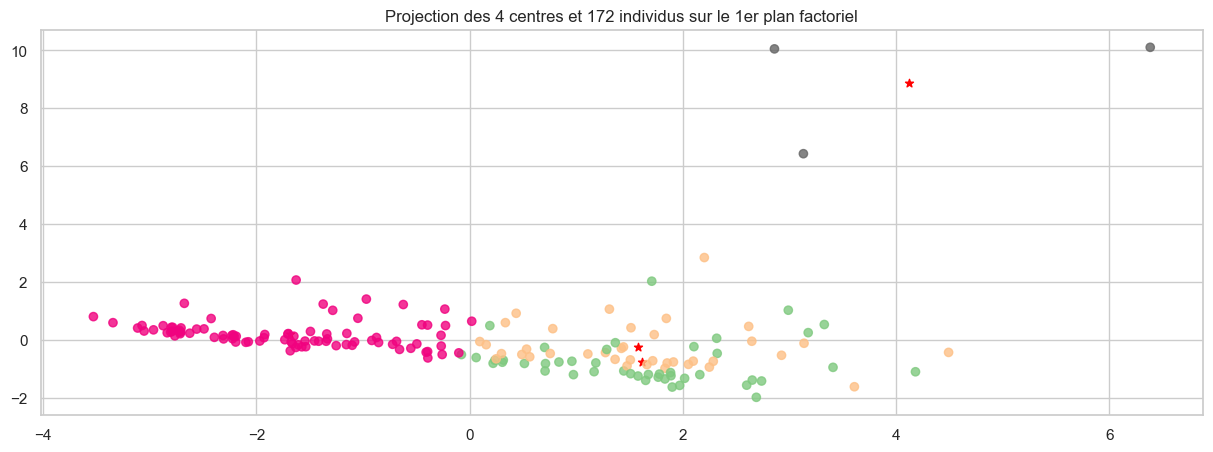

In [304]:
# Projection sur le 1e plan factoriel

plt.figure(figsize=(15, 5))

# Centre des clusters sous forme d'une petite croix rouge.
plt.scatter(centroids_projected[:, 0],
            centroids_projected[:, 1], marker="*", color='red')

plt.scatter(Y_projected[:, 0], Y_projected[:, 1],
            c=clusters.astype(float), cmap='Accent', alpha=0.8)

plt.title("Projection des {} centres et {} individus sur le 1er plan factoriel".format(
    len(centroids), Y_projected.shape[0]))

plt.show()

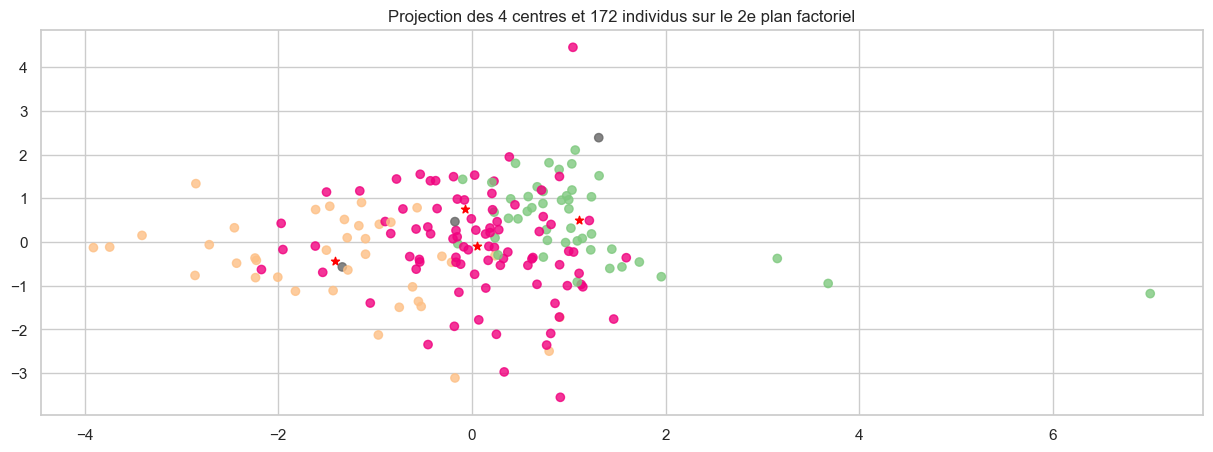

In [305]:
# Projection sur le 2e plan

plt.figure(figsize=(15, 5))

# Centre des clusters sous forme d'une petite croix rouge.
plt.scatter(centroids_projected[:, 2],
            centroids_projected[:, 3], marker="*", color='red')

plt.scatter(Y_projected[:, 2], Y_projected[:, 3],
            c=clusters.astype(float), cmap='Accent', alpha=0.8)

plt.title("Projection des {} centres et {} individus sur le 2e plan factoriel".format(
    len(centroids), Y_projected.shape[0]))

plt.show()

In [306]:
# Ajout des clusters à notre dataframe initial

analyse["Cluster"] = clusters

In [307]:
# Nombre de pays par clusters

print(str(len(analyse[analyse['Cluster'] == 0])) + " Pays dans le cluster 0")
print(str(len(analyse[analyse['Cluster'] == 1])) + " Pays dans le cluster 1")
print(str(len(analyse[analyse['Cluster'] == 2])) + " Pays dans le cluster 2")
print(str(len(analyse[analyse['Cluster'] == 3])) + "  Pays dans le cluster 3")

45 Pays dans le cluster 0
38 Pays dans le cluster 1
86 Pays dans le cluster 2
3  Pays dans le cluster 3


In [308]:
# Repartition des pays par cluster

cluster0 = analyse[analyse['Cluster'] == 0]
cluster1 = analyse[analyse['Cluster'] == 1]
cluster2 = analyse[analyse['Cluster'] == 2]
cluster3 = analyse[analyse['Cluster'] == 3]

In [309]:
# Moyenne des clusters / Centroïde

cluster = analyse.groupby('Cluster')[features].mean()
cluster['NB Pays'] = analyse.Cluster.value_counts()
cluster

,Proportion volaille dispo,Proportion Kcal volaille,Proportion proteine volaille,Proportion import volaille,Proportion production volaille,Evolution Pop 2012-2017,PIB/Habitant $,Indice stabilité politique,Montant importation poulet 1000$,Taxe commerce inter,Taux utilisation internet,Distance,Evolution PIB 2012-2017,NB Pays
Cluster,,,,,,,,,,,,,,
0,0.003556,0.015111,0.059556,0.010444,0.004000,0.654000,38216.774667,0.500889,40584.688889,0.795778,79.556000,1992.456667,12.411333,45
1,0.004737,0.032632,0.102105,0.006842,0.004474,5.352105,27388.758947,0.418421,5946.947368,4.615526,65.728158,8998.283158,6.673947,38
2,0.002093,0.005465,0.022442,0.002209,0.001860,11.214884,6986.888372,-0.571047,4642.380729,6.408605,32.616744,6690.184186,9.986163,86
3,0.140000,0.030000,0.093333,0.013333,0.160000,3.490000,29653.400000,-0.060000,16432.000000,1.626667,69.680000,8171.403333,12.553333,3


Le cluster 1 est celui qui à le plus haut taux de proportion de protéine et de proportion de Kcal de volaille, suivi de très près par le cluster 3.

Le cluster 2 est celui qui importe le plus de volaille mais c'est le cluster 0 qui depense le plus dans l'importation de volaille suivi du cluster 3

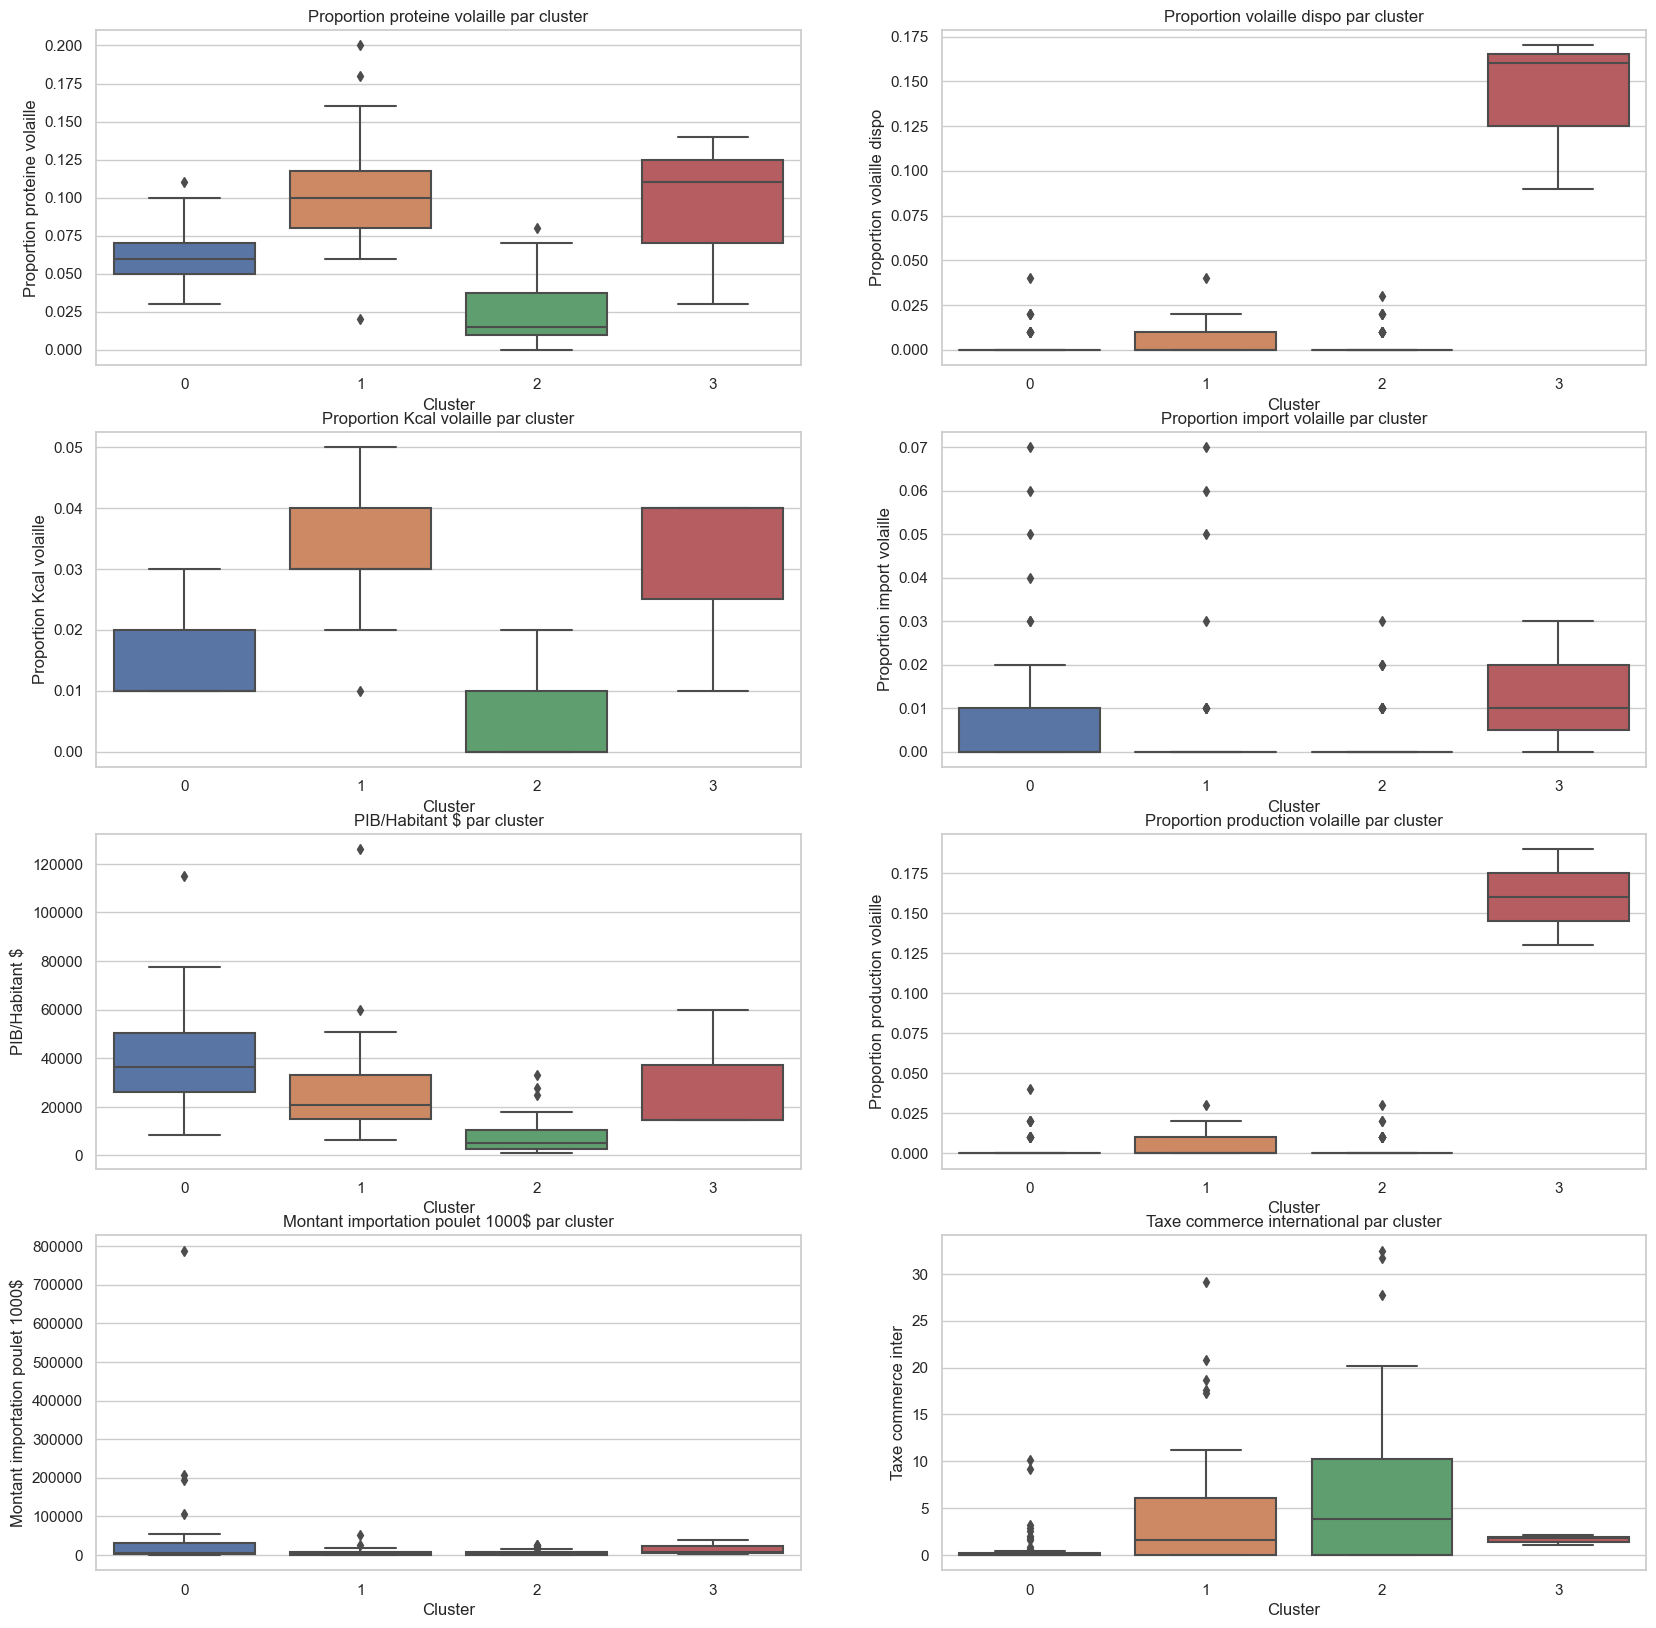

In [310]:
# Aperçu visuelle des groupes par Boxplot, en abscisse les numéros des groupes

plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

# Proportion proteine volaille par groupe

plt.subplot(421)
sns.boxplot(data=analyse, x='Cluster', y='Proportion proteine volaille')
plt.title('Proportion proteine volaille par cluster')

# Proportion volaille dispo par groupe

plt.subplot(422)
sns.boxplot(data=analyse, x='Cluster', y='Proportion volaille dispo')
plt.title('Proportion volaille dispo par cluster')

# Proportion Kcal volaille par groupe

plt.subplot(423)
sns.boxplot(data=analyse, x='Cluster', y='Proportion Kcal volaille')
plt.title('Proportion Kcal volaille par cluster')

# Proportion import volaille par groupe

plt.subplot(424)
sns.boxplot(data=analyse, x='Cluster', y='Proportion import volaille')
plt.title('Proportion import volaille par cluster')


# PIB/Habitant $ par groupe

plt.subplot(425)
sns.boxplot(data=analyse, x='Cluster', y='PIB/Habitant $')
plt.title('PIB/Habitant $ par cluster')

# Proportion production volaille par groupe

plt.subplot(426)
sns.boxplot(data=analyse, x='Cluster', y='Proportion production volaille')
plt.title('Proportion production volaille par cluster')

# Montant importation poulet 1000$ par groupe

plt.subplot(427)
sns.boxplot(data=analyse, x='Cluster', y='Montant importation poulet 1000$')
plt.title('Montant importation poulet 1000$ par cluster')

# Taxe commerce international par groupe

plt.subplot(428)
sns.boxplot(data=analyse, x='Cluster', y='Taxe commerce inter')
plt.title('Taxe commerce international par cluster')


plt.show()

<b> En se basant sur de la proportion de protéine et de proportion de Kcal de volaille, ainsi que sur les importations, le groupe à retenir est le cluster 1 et aussi 3.
on pourrait également ajouter le cluster 0 si on se basant sur les depenses en importation de volaille. </b>

In [311]:
# Pays du cluster 0

analyse[analyse['Cluster'] == 0].index

Index(['Albanie', 'Allemagne', 'Autriche', 'Belgique', 'Bosnie-Herzégovine',
       'Bulgarie', 'Bélarus', 'Chypre', 'Croatie', 'Cuba', 'Danemark',
       'Espagne', 'Estonie', 'Finlande', 'France', 'Fédération de Russie',
       'Grèce', 'Géorgie', 'Hongrie', 'Irlande', 'Islande', 'Italie', 'Japon',
       'Lettonie', 'Lituanie', 'Luxembourg', 'Macédoine du Nord', 'Malte',
       'Monténégro', 'Norvège', 'Pays-Bas', 'Pologne', 'Portugal', 'Roumanie',
       'Royaume-Uni de Grande-Bretagne et d'Irlande du Nord',
       'République de Corée', 'République de Moldova', 'Serbie', 'Slovaquie',
       'Slovénie', 'Suisse', 'Suède', 'Tchéquie', 'Ukraine',
       'Émirats arabes unis'],
      dtype='object', name='Zone')

In [312]:
# Pays du cluster 1

analyse[analyse['Cluster'] == 1].index

Index(['Afrique du Sud', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Australie', 'Bahamas', 'Barbade', 'Bolivie (État plurinational de)',
       'Canada', 'Chili', 'Hong-Kong', 'Macao', 'Taiwan', 'Colombie',
       'Costa Rica', 'Dominique', 'Fidji', 'Grenade', 'Guyana',
       'Iran (République islamique d')', 'Israël', 'Jamaïque', 'Koweït',
       'Malaisie', 'Maurice', 'Mexique', 'Nouvelle-Calédonie',
       'Nouvelle-Zélande', 'Panama', 'Polynésie française',
       'République dominicaine', 'Saint-Kitts-et-Nevis',
       'Saint-Vincent-et-les Grenadines', 'Sainte-Lucie', 'Samoa', 'Suriname',
       'Trinité-et-Tobago', 'Uruguay'],
      dtype='object', name='Zone')

In [313]:
# Pays du cluster 3

analyse[analyse['Cluster'] == 3].index

Index(['Brésil', 'Chine', 'États-Unis d'Amérique'], dtype='object', name='Zone')

In [314]:
# Liste des pays des clusters 0,1 & 3

df_cluster_subset = analyse.query('[0,1,3] in Cluster')
df_cluster_subset.shape

(86, 14)

In [315]:
# Visualisation des pays des clusters 0,1 & 3

df_cluster_subset.head()

,Proportion volaille dispo,Proportion Kcal volaille,Proportion proteine volaille,Proportion import volaille,Proportion production volaille,Evolution Pop 2012-2017,PIB/Habitant $,Indice stabilité politique,Montant importation poulet 1000$,Taxe commerce inter,Taux utilisation internet,Distance,Evolution PIB 2012-2017,Cluster
Zone,,,,,,,,,,,,,,
Afrique du Sud,0.02,0.03,0.10,0.03,0.01,7.91,13860.3,-0.28,7394.0,3.17,56.17,9306.64,-0.62,1
Albanie,0.00,0.02,0.04,0.00,0.00,-1.03,12771.0,0.38,3266.0,1.59,62.40,1603.94,13.74,0
Allemagne,0.02,0.01,0.06,0.06,0.01,2.08,53071.5,0.59,193759.0,0.00,84.39,880.63,6.41,0
Antigua-et-Barbuda,0.00,0.05,0.13,0.00,0.00,5.55,19840.3,0.75,35.0,0.00,0.00,6711.07,10.43,1
Arabie saoudite,0.01,0.03,0.11,0.05,0.01,13.54,47306.2,-0.64,17495.0,2.91,94.18,4686.62,-1.50,1


### 7. Comparaison des clusters obtenus par dendrogramme et par Kmeans et sélection des pays

### Comparaison des clusters obtenus par dendrogramme et Kmeans

In [316]:
# Comparaison des data frames

df_cah_subset = df_cah_subset.reset_index()
df_cluster_subset = df_cluster_subset.reset_index()


df_cah_subset.drop(columns='index', inplace=True)

#df_cluster_subset.drop(columns='index', inplace=True)

In [317]:
# Union des deux data frames

df_common = pd.merge(df_cah_subset, df_cluster_subset, on=['Zone', 'Proportion volaille dispo',
                                                           'Proportion Kcal volaille', 'Proportion proteine volaille',
                                                           'Proportion import volaille', 'Proportion production volaille',
                                                           'Evolution Pop 2012-2017', 'PIB/Habitant $',
                                                           'Indice stabilité politique', 'Montant importation poulet 1000$',
                                                           'Taxe commerce inter', 'Taux utilisation internet', 'Distance',
                                                           'Evolution PIB 2012-2017'], how='outer', indicator=True)

In [318]:
# Lignes qui diffèrent

print(df_common[df_common['_merge'] != 'both'].shape)

df_common[df_common['_merge'] != 'both'].head()

(9, 17)


,Zone,Proportion volaille dispo,Proportion Kcal volaille,Proportion proteine volaille,Proportion import volaille,Proportion production volaille,Evolution Pop 2012-2017,PIB/Habitant $,Indice stabilité politique,Montant importation poulet 1000$,Taxe commerce inter,Taux utilisation internet,Distance,Evolution PIB 2012-2017,Groupe,Cluster,_merge
6,Arménie,0.00,0.01,0.04,0.00,0.00,2.10,12115.1,-0.62,4169.0,5.71,64.74,3439.40,16.52,3.0,NaN,left_only
38,Honduras,0.00,0.02,0.05,0.00,0.00,9.12,5562.0,-0.56,5886.0,0.00,31.70,8811.00,9.80,2.0,NaN,left_only
56,Nicaragua,0.00,0.02,0.05,0.00,0.00,6.72,6004.0,-0.05,7898.0,3.48,30.40,8901.60,18.11,2.0,NaN,left_only
83,Viet Nam,0.01,0.01,0.03,0.02,0.01,5.34,8996.4,0.23,9832.0,0.00,58.14,10132.81,30.16,2.0,NaN,left_only
85,Équateur,0.00,0.02,0.04,0.00,0.00,8.47,11617.9,-0.07,16405.0,0.00,55.80,9626.17,1.63,2.0,NaN,left_only


In [319]:
# Lignes présentent dans le dendrogramme seulement

print(df_common[df_common['_merge'] == 'left_only'].shape)

df_common[df_common['_merge'] == 'left_only'].head()

(5, 17)


,Zone,Proportion volaille dispo,Proportion Kcal volaille,Proportion proteine volaille,Proportion import volaille,Proportion production volaille,Evolution Pop 2012-2017,PIB/Habitant $,Indice stabilité politique,Montant importation poulet 1000$,Taxe commerce inter,Taux utilisation internet,Distance,Evolution PIB 2012-2017,Groupe,Cluster,_merge
6,Arménie,0.00,0.01,0.04,0.00,0.00,2.10,12115.1,-0.62,4169.0,5.71,64.74,3439.40,16.52,3.0,NaN,left_only
38,Honduras,0.00,0.02,0.05,0.00,0.00,9.12,5562.0,-0.56,5886.0,0.00,31.70,8811.00,9.80,2.0,NaN,left_only
56,Nicaragua,0.00,0.02,0.05,0.00,0.00,6.72,6004.0,-0.05,7898.0,3.48,30.40,8901.60,18.11,2.0,NaN,left_only
83,Viet Nam,0.01,0.01,0.03,0.02,0.01,5.34,8996.4,0.23,9832.0,0.00,58.14,10132.81,30.16,2.0,NaN,left_only
85,Équateur,0.00,0.02,0.04,0.00,0.00,8.47,11617.9,-0.07,16405.0,0.00,55.80,9626.17,1.63,2.0,NaN,left_only


In [320]:
# Lignes présentent dans le Kmeans seulement

print(df_common[df_common['_merge'] == 'right_only'].shape)

df_common[df_common['_merge'] == 'right_only'].head()

(4, 17)


,Zone,Proportion volaille dispo,Proportion Kcal volaille,Proportion proteine volaille,Proportion import volaille,Proportion production volaille,Evolution Pop 2012-2017,PIB/Habitant $,Indice stabilité politique,Montant importation poulet 1000$,Taxe commerce inter,Taux utilisation internet,Distance,Evolution PIB 2012-2017,Groupe,Cluster,_merge
87,Bélarus,0.00,0.02,0.07,0.00,0.00,0.35,18356.1,-0.05,9034.0,10.18,74.44,1832.07,-1.37,NaN,0.0,right_only
88,Colombie,0.01,0.02,0.07,0.01,0.01,6.15,14171.3,-0.77,12113.0,1.73,62.26,8632.23,10.26,NaN,1.0,right_only
89,Iran (République islamique d'),0.02,0.02,0.07,0.00,0.02,6.80,15883.4,-0.93,9511.0,0.00,64.04,4219.84,6.70,NaN,1.0,right_only
90,Ukraine,0.01,0.02,0.05,0.01,0.01,-2.13,11860.6,-1.87,41215.0,2.55,58.89,2029.96,-8.66,NaN,0.0,right_only


### Sélection des pays

In [321]:
# Lignes communes entre les deux découpages

print(df_common[df_common['_merge'] == 'both'].shape)
df_common[df_common['_merge'] == 'both']

(82, 17)


,Zone,Proportion volaille dispo,Proportion Kcal volaille,Proportion proteine volaille,Proportion import volaille,Proportion production volaille,Evolution Pop 2012-2017,PIB/Habitant $,Indice stabilité politique,Montant importation poulet 1000$,Taxe commerce inter,Taux utilisation internet,Distance,Evolution PIB 2012-2017,Groupe,Cluster,_merge
0,Afrique du Sud,0.02,0.03,0.10,0.03,0.01,7.91,13860.3,-0.28,7394.0,3.17,56.17,9306.64,-0.62,3.0,1.0,both
1,Albanie,0.00,0.02,0.04,0.00,0.00,-1.03,12771.0,0.38,3266.0,1.59,62.40,1603.94,13.74,3.0,0.0,both
2,Allemagne,0.02,0.01,0.06,0.06,0.01,2.08,53071.5,0.59,193759.0,0.00,84.39,880.63,6.41,3.0,0.0,both
3,Antigua-et-Barbuda,0.00,0.05,0.13,0.00,0.00,5.55,19840.3,0.75,35.0,0.00,0.00,6711.07,10.43,2.0,1.0,both
4,Arabie saoudite,0.01,0.03,0.11,0.05,0.01,13.54,47306.2,-0.64,17495.0,2.91,94.18,4686.62,-1.50,3.0,1.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Tchéquie,0.00,0.02,0.05,0.01,0.00,0.56,38824.9,1.00,23398.0,0.00,78.72,884.67,15.25,3.0,0.0,both
81,Trinité-et-Tobago,0.00,0.04,0.12,0.00,0.00,2.92,27277.9,0.28,642.0,6.47,70.60,7218.51,-8.58,2.0,1.0,both
82,Uruguay,0.00,0.01,0.02,0.00,0.00,1.71,23009.9,1.05,2656.0,3.11,70.32,10936.07,10.17,2.0,1.0,both
84,Émirats arabes unis,0.00,0.03,0.11,0.03,0.00,3.78,67183.6,0.62,2297.0,0.08,94.82,5251.80,17.07,3.0,0.0,both


In [322]:
# Enregistrement des pays en commun dans la variable "liste_finale"

liste_finale = df_common[df_common['_merge'] == 'both']

Le choix des clusters, des pays à cibler doit prendre en compte plusieurs paramètres et critères.
Cette selection doit se faire en étroite collaboration avec les experts du métier, car ils seront à mieux de donner des indications permettant d'affiner la selection.
Pour nous laisser plus de marge, nous allons faire plusieurs selection selon différents paramètre

In [333]:
# Pays à cibler selon la proportion de proteine de volaille

liste_finale.sort_values('Proportion proteine volaille',ascending=False)[['Zone']].head(10)

,Zone
42,Israël
71,Saint-Vincent-et-les Grenadines
73,Samoa
18,Hong-Kong
70,Saint-Kitts-et-Nevis
72,Sainte-Lucie
86,États-Unis d'Amérique
3,Antigua-et-Barbuda
7,Australie
81,Trinité-et-Tobago


In [334]:
# Pays à cibler selon la Proportion Kcal volaille

liste_finale.sort_values('Proportion Kcal volaille',ascending=False)[['Zone']].head(10)

,Zone
72,Sainte-Lucie
42,Israël
3,Antigua-et-Barbuda
71,Saint-Vincent-et-les Grenadines
86,États-Unis d'Amérique
44,Jamaïque
18,Hong-Kong
34,Grenade
70,Saint-Kitts-et-Nevis
14,Brésil


In [337]:
# Pays à cibler selon la Proportion import volaille

liste_finale.sort_values('Proportion import volaille',ascending=False)[['Zone']].head(11)

,Zone
54,Mexique
45,Japon
2,Allemagne
18,Hong-Kong
4,Arabie saoudite
66,Royaume-Uni de Grande-Bretagne et d'Irlande du...
61,Pays-Bas
32,France
21,Chine
0,Afrique du Sud


In [338]:
# Pays à cibler selon le PIB/Habitant $

liste_finale.sort_values('PIB/Habitant $',ascending=False)[['Zone']].head(10)

,Zone
19,Macao
49,Luxembourg
40,Irlande
77,Suisse
84,Émirats arabes unis
57,Norvège
86,États-Unis d'Amérique
18,Hong-Kong
41,Islande
26,Danemark


In [339]:
# Pays à cibler selon le Montant importation poulet 1000$

liste_finale.sort_values('Montant importation poulet 1000$',ascending=False)[['Zone']].head(10)

,Zone
61,Pays-Bas
11,Belgique
2,Allemagne
62,Pologne
39,Hongrie
16,Canada
28,Espagne
65,Roumanie
66,Royaume-Uni de Grande-Bretagne et d'Irlande du...
21,Chine


In [341]:
# Pays à cibler selon la Distance entre la France et les autres pays (Pays les plus proche)

liste_finale.sort_values('Distance',ascending=True)[['Zone']].head(11)

,Zone
32,France
11,Belgique
49,Luxembourg
66,Royaume-Uni de Grande-Bretagne et d'Irlande du...
61,Pays-Bas
77,Suisse
40,Irlande
2,Allemagne
80,Tchéquie
76,Slovénie


In [343]:
# Pays à cibler selon l'Indice stabilité politique

liste_finale.sort_values('Indice stabilité politique',ascending=False)[['Zone']].head(10)

,Zone
59,Nouvelle-Zélande
19,Macao
41,Islande
49,Luxembourg
77,Suisse
52,Malte
27,Dominique
73,Samoa
57,Norvège
64,Portugal


### 8. Conclusion

<b> Au terme de nos différentes explorations, analyses et visualisations,
Nous avons retenu 4 clusters avec le Dendrogramme et la méthode du Kmeans.
    
<b> Il ressort du rapprochement de ces deux méthodes une première liste de 82 pays.</b> 
    
<b> Afin de réduire cette liste, il faut avec les spécialistes du métier se mettre d’accord sur les critères les plus importants à prendre en compte afin d’affiner la liste obtenue.</b> 
    
<b> Ainsi, après le choix du/des critères afin d’avoir une liste réduite des pays, il va ensuite falloir se pencher sur l’aspect culturel des pays cibles, afin de mettre en place les stratégies adéquates afin de faciler l'accès aux marchés des pays cible et également former nos collaborateurs en cas de barrière de la langue ou les contraintes juridiques spécifiques a chaque pays.</b> 

[↟](#Sommaire)